<a href="https://www.kaggle.com/mickaelnarboni/seattle-co2-totalenergyconsumption-2016?scriptVersionId=86709353" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mathematical Considerations

In order to define the best predictive model in the frame of our project, we'll use some scoring metrics for each model.
We are using **regression** models to predict our output because we work with continuous data.

The **Mean Squared Error**, **Mean Absolute error**, **Root Mean Squared Error**, and **R-Squared or Coefficient of determination** metrics are used to evaluate the performance of the model in regression analysis.

**Mean Absolute Error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

<div style="width:100%;text-align: center;">
<img align=middle src="https://i.imgur.com/BmBC8VW.jpg" width="350"/>
    
 
**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

<div style="width:100%;text-align: center;">
<img align=middle src="https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg" width="330"/>
    
 
**Root Mean Squared Error** is the **square root of Mean Squared error**. It measures the standard deviation of residuals.
 
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png" width="300"/>
   

**The coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
    
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/1400/0*8rFYfZJfJZpW2cEV.png" width="440"/>

# Set up Environment

We import all the relevant librairies to display our models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
from time import process_time

# calling our libraries for our models

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from math import sqrt
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import validation_curve
from sklearn import preprocessing
from sklearn.dummy import DummyRegressor


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sea-building-energy-benchmarking/clean_p3 (1).csv
/kaggle/input/sea-building-energy-benchmarking/archive/2016-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2016-building-energy-benchmarking.json
/kaggle/input/sea-building-energy-benchmarking/archive/2015-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2015-building-energy-benchmarking.json


In [2]:
import pandas as pd
# set option to be able to get each column and row of our dataframes
pd.set_option("display.max_columns", None)
data = pd.read_csv('../input/sea-building-energy-benchmarking/clean_p3 (1).csv',sep='\t', low_memory=False, index_col=[0])
data.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3353,50090,2016,Multifamily MR (5-9),Mid-Rise Multifamily,131910 - LIV Seattle,4717 Brooklyn Ave NE,Seattle,WA,98105.0,8817400110,4,NORTHEAST,47.66366,-122.31450,2015,1.0,7,63825,4850,58975,Multifamily Housing,Multifamily Housing,71241.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,2.689826,0.0,4.407752e+05,1503925.0,8337.259766,833726.0,False,Compliant,54.76,0.86
3354,50092,2016,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,1101 NE Campus Pkwy,Seattle,WA,98195.0,1142002345,4,NORTHEAST,47.65577,-122.31702,2015,1.0,7,325000,0,325000,Residence Hall/Dormitory,Residence Hall/Dormitory,325000.0,69.0,50.700001,53.599998,109.900002,113.000000,1.646749e+07,2.813833,0.0,2.583406e+06,8814581.0,76529.031250,7652903.0,False,Compliant,467.90,1.44
3355,50093,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Raven Terrace,820 Yesler Way,Seattle,WA,98104.0,9822000080,3,EAST,47.60189,-122.32182,2015,1.0,6,86045,8908,77137,"Multifamily Housing, Other - Public Services, ...",Multifamily Housing,78359.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,2.680075,0.0,6.334232e+05,2161240.0,0.000000,0.0,False,Compliant,15.07,0.18
3357,50095,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Broadstone Sky,4745 40th Ave SW,Seattle,WA,98116.0,7579200395,1,SOUTHWEST,47.55976,-122.38320,2015,1.0,7,208136,58818,149318,"Multifamily Housing, Parking",Multifamily Housing,168221.0,100.0,21.100000,21.100000,46.900002,46.900002,3.552185e+06,2.713573,0.0,5.828756e+05,1988772.0,15634.129880,1563413.0,False,Compliant,96.90,0.47
3358,50098,2016,Multifamily LR (1-4),Low-Rise Multifamily,1806,1806 23rd Avenue,Seattle,WA,98122.0,1407300010,3,CENTRAL,47.61791,-122.30230,2014,1.0,4,20246,2580,17666,Multifamily Housing,Multifamily Housing,17666.0,99.0,44.700001,45.000000,106.099998,106.400002,7.898472e+05,2.609067,0.0,1.465200e+05,499926.0,2899.209961,289921.0,False,Compliant,18.88,0.93


# Convert Continuous Variables into Discrete Values

At the difference of LabelEncoder(), **OneHotEncoder()** does not create a hierarchy in the numerical values. In our case, we don't have hierarchy in our modalities, so we'll definitely use this class to convert the string into numerical values. 

We're going to use on the categorical variables that did interest us during the exploratory phase:

- BuildingType
- PrimaryPropertyType
- Neighborhood

In [3]:
enc = data[['BuildingType','PrimaryPropertyType','Neighborhood']]
data = data.drop(columns=['BuildingType','PrimaryPropertyType','Neighborhood'])

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

# passing our categorical columns (label encoded values)

categorical_features = pd.DataFrame(encoder.fit_transform(enc))

# label the encoded columns with the features of the original variables

categorical_features.columns = encoder.get_feature_names(['BuildingType','PrimaryPropertType','Neighborhood'])

# merge with main dataframe

enc_data = data.join(categorical_features, how="inner")
enc_data

,OSEBuildingID,DataYear,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,1,2016,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,2.761569,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,False,Compliant,249.98,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2016,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,2.771009,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,Compliant,295.86,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,2.896946,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,False,Compliant,2089.28,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2016,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,2.757081,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,False,Compliant,286.43,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2016,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,

# Features and Predictive Variable for Total Energy Consumption

We import our features in a dataframe called X which will contain all the numerical (discrete) variables that do predict our predictive variable.

As predictive variable to predict the total energy consumption of a property in Seattle, we decide to pick *SiteEnergyUseWN(kBtu)* that seems the most representative of our real case study, which means that the lower *SiteEnergyUseWN(kBtu)* is, the lower the consumption of the building will be.

*SiteEnergyUseWN(kBtu)* is contained in our y dataframe for predictions

In [5]:
# Create the dataframe that will contain all our features for modeling

X = pd.concat([enc_data.loc[:,'PropertyGFATotal':'PropertyGFABuilding(s)'],enc_data.loc[:,'LargestPropertyUseTypeGFA':'SiteEnergyUse(kBtu)'],enc_data.loc[:,'SteamUse(kBtu)':'NaturalGas(kBtu)'],enc_data.loc[:,'TotalGHGEmissions':'Neighborhood_SOUTHWEST']],1).copy()
X = pd.DataFrame(X)
X.head()

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103566,15064,88502,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,956110,196718,759392,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61320,0,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175580,62000,113580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
median_y = enc_data['SiteEnergyUseWN(kBtu)'].median()
enc_data['SiteEnergyUseWN(kBtu)'].fillna(value = median_y, inplace=True)

In [7]:
y = enc_data.loc[:,'SiteEnergyUseWN(kBtu)']

# Correlation Matrix

We re-insert our correlation matrix from our exploratory phase because we notice some overfitting between our test and training datasets while creating the models.

We're working on predicting the variable *TotalGHGEmissions* so we want to define a threshold by which we'll not take in consideration the variables in our X features to not give too many degrees of freedom to our models.

By observing the correlation matrix, we gather the variables that are correlated to our predictive variable with a correlation above 40%.

- PropertyGFATotal
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- Electricity(kBtu)
- NaturalGas(therms)
- NaturalGas(kBtu)
- GHGEmissionsIntensity

From this list, we also notice that some variables are highly correlated between them such as:

- **PropertyGFATotal**, **PropertyGFABuilding(s)** and **LargestPropertyUseTypeGFA**
- **SiteEnergyUse(kBtu)** and **SiteEnergyUseWN(kBtu)**
- **Electricity(kWh)** and **Electricity(kBtu)**
- **NaturalGas(therms)** and **NaturalGas(kBtu)**

We decide to keep **PropertyGFABuilding(s)** because it get a more accurate description of the building GFA and drop the two other correlated variables.
We decide to keep  **SiteEnergyUseWN(kBtu)** over SiteEnergyUse(kBtu).
We decide to keep the **Electricity(kBtu)** and **NaturalGas(kBtu)** because of there are measured in the same units so we keep a certain homogeneity in our data.

Finally, we decide to drop the following variables that are too coreelated to one another:

- PropertyGFATotal
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- NaturalGas(therms)
- GHGEmissionsIntensity

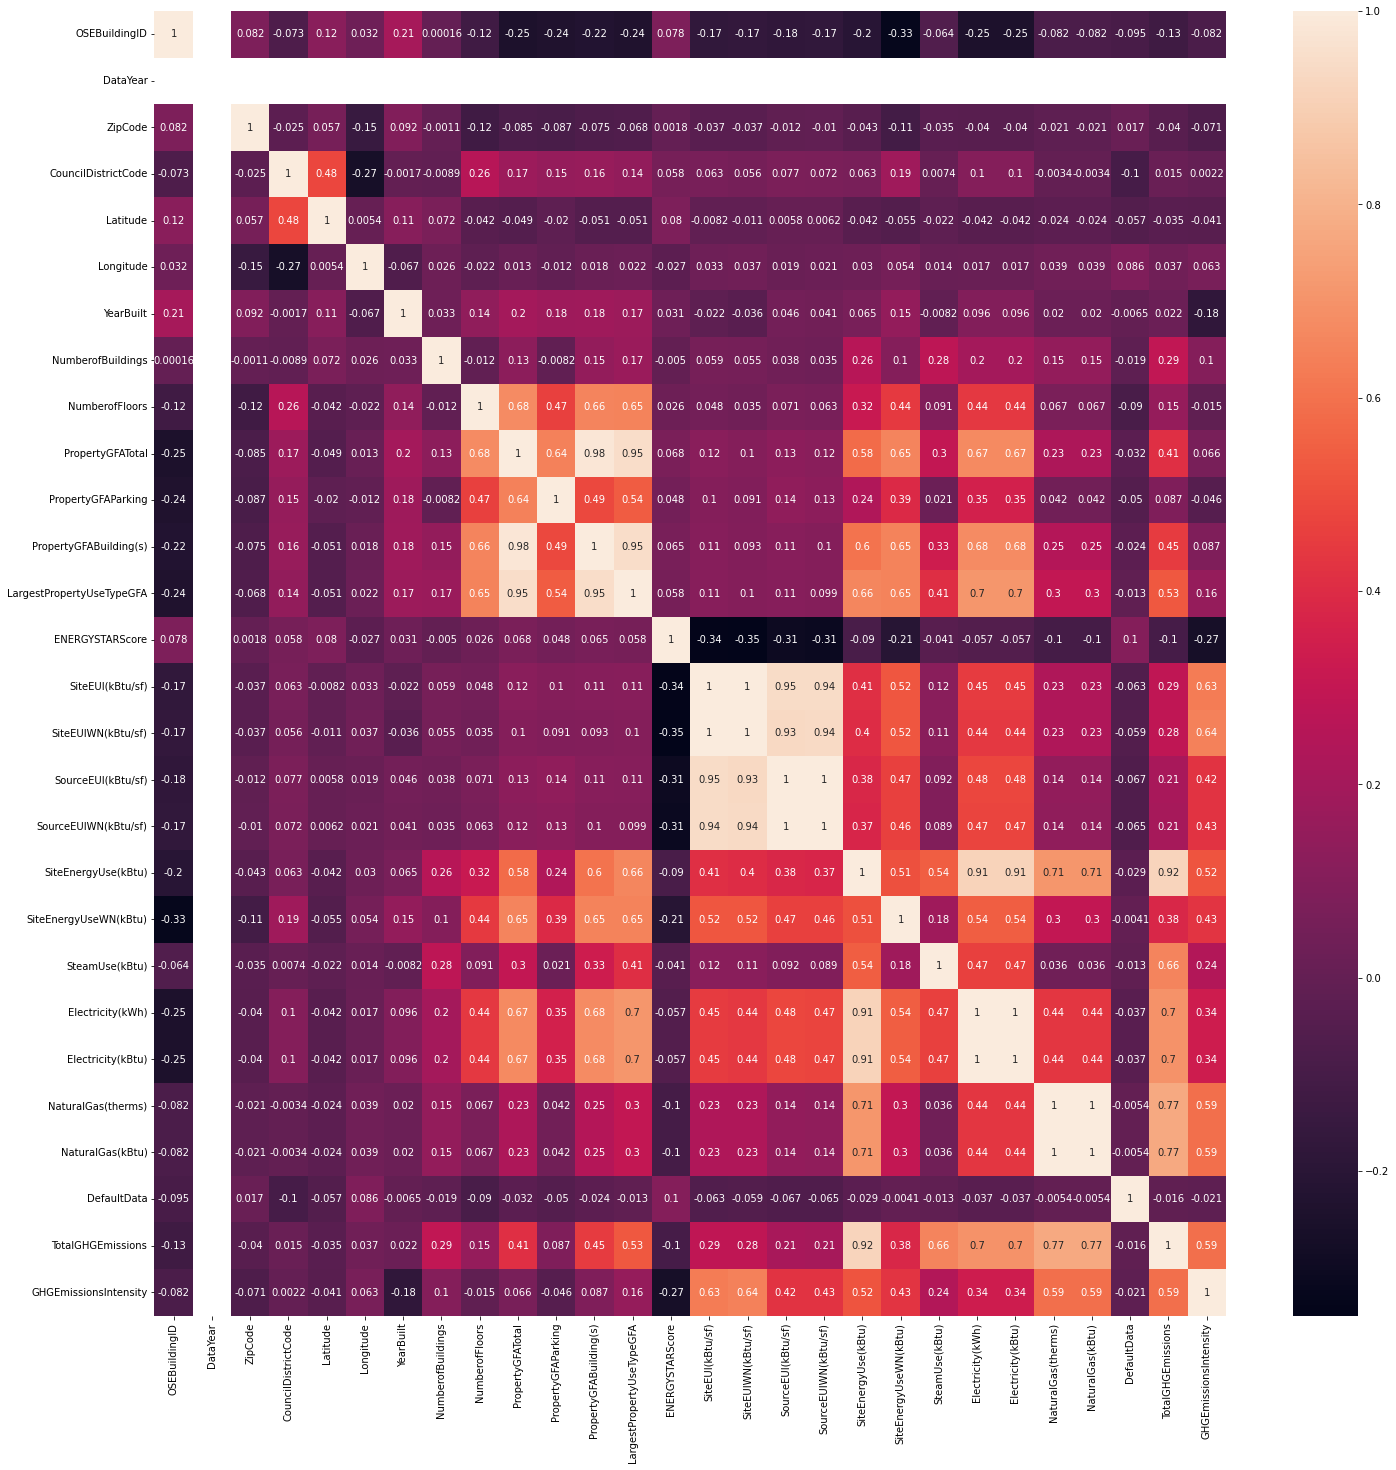

In [8]:
# correlation matrix
fig, ax = plt.subplots(figsize=(24, 24))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
X = X.drop(columns=['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,81.699997,84.300003,182.500000,189.000000,3946027.0,1276453.0,249.98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,94.800003,97.900002,176.100006,179.399994,3242851.0,5145082.0,295.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,96.000000,97.699997,241.899994,244.100006,49526664.0,1493800.0,2089.28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,110.800003,113.300003,216.199997,224.000000,2768924.0,1811213.0,286.43,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,114.800003,118.699997,211.399994,215.600006,5368607.0,8803998.0,505.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing the variables from the consumption bill for our predictions

There are certain variables that we don't want to work with because they depend on existing buildings.
We want to make our predictions for future buildings. 

In [10]:
X = X.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kBtu)','TotalGHGEmissions', 'Electricity(kBtu)', 'NaturalGas(kBtu)'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Notes about Cross Validation

To start creating ML models, we gotta do cross-validation of our data which means dividing our dataset into a training set and a testing set.
To do so, usually, we divide our data into a certain number of blocks, for instance:

- Ten Fold Blocks Cross Validation (10 blocks)
- Four Fold Blocks Cross Validation (4 blocks)

Then we can use our different models (logistic regression, KNN, SVM...) on our training set, compare them and see which one is the most fittable to our data.

- The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

- Kernel is the mathematical function used to define the hyperparameter and it can be: linear, polynomial, rbf for instance.

Generally cross validation is used for two purposes:

- Defining the best hyperparameters for the model

- Test the model on different data points

# Features Importance

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

MDI = Mean Decrease in Impurity 

In [11]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.sort(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance and get the top 10
    fi_df10 = fi_df.nlargest(10, 'feature_importance')[:10]
    fi_df10.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df10['feature_importance'], y=fi_df10['feature_names'])
    
    
    #Add chart labels
    plt.title(model_type +  ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES') 

# Naive Baseline Creation

Using the mean strategy, we create a baseline to compare our ML models


In [12]:
# adding a dummy baseline to our cross-validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict_dummy = dummy.predict(X_test)

# dummy statistical metrics

dummy_test_mse = mean_squared_error(y_test, y_predict_dummy)
dummy_test_mae = mean_absolute_error(y_test, y_predict_dummy)
dummy_test_r2 = r2_score(y_test, y_predict_dummy)
dummy_test_rmse = sqrt(mean_squared_error(y_test, y_predict_dummy))

# cross-validation

cv_dummy = cross_val_score(dummy, X_test, y_predict_dummy, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')

# Decision Trees

In [13]:
from sklearn.tree import DecisionTreeRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# Call the model 
tree = DecisionTreeRegressor()

# define values for hyperparameters
max_features = [20]
max_depth = [7]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [5]
min_impurity_decrease = [0.685]

# Create the random grid
tree_grid = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes': max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_tree = GridSearchCV(tree, param_grid = tree_grid, cv=KFold(n_splits=5,shuffle=True))

# Performing training
tree.fit(X_train, y_train)

#Predict the response for test and train datasets
y_tree_test_pred = tree.predict(X_test)
y_tree_train_pred = tree.predict(X_train)

# mean error square
tree_test_mae = mean_absolute_error(y_test, y_tree_test_pred)
tree_train_mae = mean_absolute_error(y_train, y_tree_train_pred)

# fit the grid
g_tree.fit(X_train, y_train)

# best hyperparameter
g_tree_param = g_tree.best_params_

# The mean squared error
tree_test_mse = mean_squared_error(y_test, y_tree_test_pred)
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred)


# The coefficient of determination: 1 is perfect prediction
tree_test_r2 = r2_score(y_test, y_tree_test_pred)
tree_train_r2 = r2_score(y_train, y_tree_train_pred)

# The root mean squared error
tree_test_rmse = sqrt(mean_squared_error(y_test, y_tree_test_pred))
tree_train_rmse = sqrt(mean_squared_error(y_train, y_tree_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
tree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Trees:", tree_time)

Elapsed time in seconds to run Decision Trees: 0.05474653400000129


In [14]:
import optuna

def objective(trial):
    
    
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    splitter= trial.suggest_categorical("splitter",choices=["best", "random"]) 
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    

    ## Create Model
    
    optuna_tree  = DecisionTreeRegressor(max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, splitter=splitter)
    
    ## Fit Model
    
    optuna_tree.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_tree.predict(X_test))
    

t1_start = process_time()


study7 = optuna.create_study(study_name="DecisionTreeRegressor")
study7.optimize(objective, n_trials=47)

# evaluation metrics

optuna_tree_rmse = sqrt(study7.best_value)
optuna_tree_mse = study7.best_value
optuna_tree_params = study7.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rtree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters:", tree_time)

print("Best Params : {}".format(optuna_tree_params))
print("\nBest MSE : {}".format(optuna_tree_mse))
print("\nBest RMSE : {}".format(optuna_tree_rmse))


[I 2022-02-01 10:52:38,450] A new study created in memory with name: DecisionTreeRegressor
[I 2022-02-01 10:52:38,461] Trial 0 finished with value: 0.00518907479389071 and parameters: {'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}. Best is trial 0 with value: 0.00518907479389071.
[I 2022-02-01 10:52:38,472] Trial 1 finished with value: 0.00518907479389071 and parameters: {'max_features': 13, 'max_leaf_nodes': 16, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.25857856169362403, 'max_depth': 5, 'min_impurity_decrease': 0.8517585454559368, 'splitter': 'best', 'min_samples_split': 12}. Best is trial 0 with value: 0.00518907479389071.
[I 2022-02-01 10:52:38,481] Trial 2 finished with value: 0.00518907479389071 and parameters: {'max_features': 19, 'max_leaf_nodes': 12, 'min_samples_leaf': 6, 'min_weight_fraction_lea

Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters: 0.05474653400000129
Best Params : {'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}

Best MSE : 0.00518907479389071

Best RMSE : 0.07203523300365391


In [15]:
# cross validation

cv_tree_train = cross_val_score(g_tree, X_train, y_tree_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_test = cross_val_score(g_tree, X_test, y_tree_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_results = pd.DataFrame([-cv_tree_train, -cv_tree_test, -cv_dummy]).transpose()
cv_tree_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_tree_results

,Training Dataset,Test Dataset,Dummy
0,0.007080,0.004509,1.972152e-31
1,0.005786,0.005090,1.972152e-31
2,0.005823,0.006500,1.972152e-31
3,0.005721,0.004886,1.972152e-31
4,0.005311,0.003862,1.972152e-31


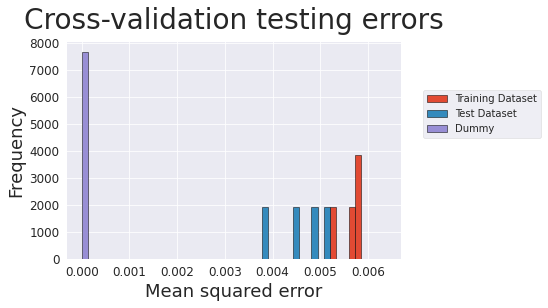

In [16]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.006379, num=50)
hist = cv_tree_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [17]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
tree_results = pd.DataFrame(['Decision Trees Regressor', tree_time, g_tree_param, optuna_tree_params, tree_train_mae, tree_test_mae, dummy_test_mae, tree_train_mse, tree_test_mse, optuna_tree_mse, dummy_test_mse, tree_train_rmse, tree_test_rmse, optuna_tree_rmse, dummy_test_rmse, tree_train_r2, tree_test_r2, dummy_test_r2]).transpose()
tree_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706


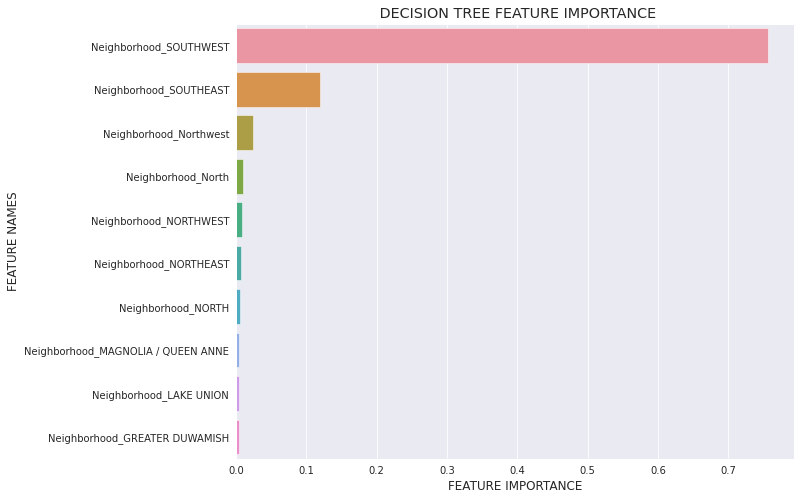

In [18]:
plot_feature_importance(tree.feature_importances_,X.columns,' DECISION TREE')

# Random Forests

In [19]:
# revoir les hyperparamètres de la random forest afin de réduire le temps de run

from sklearn.ensemble import RandomForestRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# create the model
rf = RandomForestRegressor() 

# define values for hyperparameters
n_estimators = [250]
max_features = [10]
max_depth = [8]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [7]
min_impurity_decrease = [0.65]

# Create the random grid
rf_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes':max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_rf = GridSearchCV(rf, param_grid = rf_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model 
rf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_rf_test_pred = rf.predict(X_test)
y_rf_train_pred = rf.predict(X_train)

# fit the grid
g_rf.fit(X_train, y_train)

# best hyperparameter
g_rf_param = g_rf.best_params_

# The mean absolute error
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)

# The mean squared error
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)

# The coefficient of determination: 1 is perfect prediction
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# The root mean squared error
rf_test_rmse = sqrt(mean_squared_error(y_test, y_rf_test_pred))
rf_train_rmse = sqrt(mean_squared_error(y_train, y_rf_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forest:", rf_time)

Elapsed time in seconds to run Random Forest: 3.5727068089999996


In [20]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False]) 
    

    ## Create Model
    
    optuna_rf  = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, max_samples=max_samples, bootstrap=bootstrap)
    
    ## Fit Model
    
    optuna_rf.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_rf.predict(X_test))
    

t1_start = process_time()


study2 = optuna.create_study(study_name="RandomForestsRegressor")
study2.optimize(objective, n_trials=47)

# evaluation metrics

optuna_rf_rmse = sqrt(study2.best_value)
optuna_rf_mse = study2.best_value
optuna_rf_params = study2.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters:", rf_time)

print("Best Params : {}".format(optuna_rf_params))
print("\nBest MSE : {}".format(optuna_rf_mse))
print("\nBest RMSE : {}".format(optuna_rf_rmse))


[I 2022-02-01 10:52:46,700] A new study created in memory with name: RandomForestsRegressor
[I 2022-02-01 10:52:46,858] Trial 0 finished with value: 0.005187933141813018 and parameters: {'n_estimators': 84, 'max_features': 17, 'max_leaf_nodes': 19, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.37916558446776455, 'max_depth': 15, 'min_impurity_decrease': 0.6250581024709512, 'min_samples_split': 17, 'max_samples': 57, 'bootstrap': True}. Best is trial 0 with value: 0.005187933141813018.
[I 2022-02-01 10:52:46,948] Trial 1 finished with value: 0.005189074793890716 and parameters: {'n_estimators': 59, 'max_features': 12, 'max_leaf_nodes': 16, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.14786662432077197, 'max_depth': 12, 'min_impurity_decrease': 0.8008431771272836, 'min_samples_split': 10, 'max_samples': 48, 'bootstrap': False}. Best is trial 0 with value: 0.005187933141813018.
[I 2022-02-01 10:52:47,010] Trial 2 finished with value: 0.005189074793890712 and parameters: {'n

Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters: 6.164329107
Best Params : {'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}

Best MSE : 0.005185422923869874

Best RMSE : 0.072009880737784


In [21]:
# cross validation

cv_rf_train = cross_val_score(g_rf, X_train, y_rf_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_test = cross_val_score(g_rf, X_test, y_rf_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_results = pd.DataFrame([-cv_rf_train, -cv_rf_test, -cv_dummy]).transpose()
cv_rf_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_rf_results

,Training Dataset,Test Dataset,Dummy
0,0.005925,0.002767,1.972152e-31
1,0.005059,0.005262,1.972152e-31
2,0.005655,0.004625,1.972152e-31
3,0.005141,0.004045,1.972152e-31
4,0.003901,0.003491,1.972152e-31


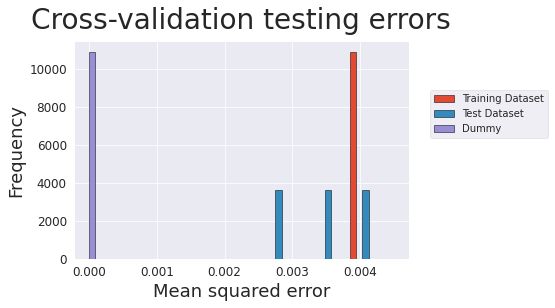

In [22]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.004492, num=50)
hist = cv_rf_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [23]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
rf_results = pd.DataFrame(['Random Forest', rf_time, g_rf_param, optuna_rf_params, rf_train_mae, rf_test_mae, dummy_test_mae, rf_train_mse, rf_test_mse, optuna_rf_mse, dummy_test_mse, rf_train_rmse, rf_test_rmse, optuna_rf_rmse, dummy_test_rmse, rf_train_r2, rf_test_r2, dummy_test_r2]).transpose()
rf_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706


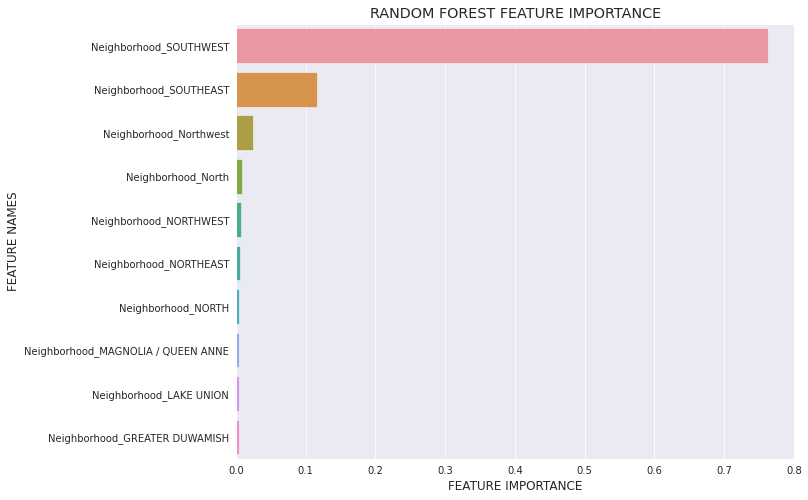

In [24]:
# features importance for random forest
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')
plt.savefig('rffeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# XGBoost

In [25]:
import xgboost as xgb
import xgboost as XGBRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
xg_boosting = xgb.XGBRegressor() 

# define values for hyperparameters
eta = [0.2] 
alpha = [0.7]
gamma = [3]
max_depth = [12]
max_leaves = [4]
min_child_weight = [3]

# Create the random grid
xgboosting_grid = {'eta': eta, 'alpha': alpha, 'gamma': gamma, 'max_depth':max_depth, 'max_leaves':max_leaves, 'min_child_weight':min_child_weight}

# cross validation to tune hyperparameter
g_xg_boosting = GridSearchCV(xg_boosting, param_grid = xgboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
xg_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_xg_boosting_test_pred = xg_boosting.predict(X_test)
y_xg_boosting_train_pred = xg_boosting.predict(X_train)

# fit the grid
g_xg_boosting.fit(X_train, y_train)

# best hyperparameter
g_xgboosting_param = g_xg_boosting.best_params_

# The mean absolute error
xg_boosting_test_mae = mean_absolute_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mae = mean_absolute_error(y_train, y_xg_boosting_train_pred)

# The mean squared error
xg_boosting_test_mse = mean_squared_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mse = mean_squared_error(y_train, y_xg_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
xg_boosting_test_r2 = r2_score(y_test, y_xg_boosting_test_pred)
xg_boosting_train_r2 = r2_score(y_train, y_xg_boosting_train_pred)

# The root mean squared error
xg_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_xg_boosting_test_pred))
xg_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_xg_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
xg_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoosting Regressor:", xg_boosting_time)

Elapsed time in seconds to run XGBoosting Regressor: 15.207185031000002


In [26]:
import optuna

def objective(trial):
    
    
    colsample_bylevel = trial.suggest_float("colsample_bylevel", 0, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0, 1)
    booster= trial.suggest_categorical("booster",choices=["gbtree", "gblinear"])
    gamma = trial.suggest_float("gamma", 0, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    max_delta_step = trial.suggest_float("max_delta_step", 0, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 25)
    min_child_weights = trial.suggest_float("min_child_weights", 0, 100)
    n_estimators = trial.suggest_int("n_estimators", 10, 2000)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 1000)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 1000)
    

    ## Create Model
    
    optuna_xgboost  = xgb.XGBRegressor(n_estimators=n_estimators, reg_alpha=reg_alpha, reg_lambda=reg_lambda, colsample_bylevel=colsample_bylevel, colsample_bytree=colsample_bytree, booster=booster, gamma=gamma, max_depth=max_depth, learning_rate=learning_rate, max_delta_step=max_delta_step, min_child_weights=min_child_weights)
    
    ## Fit Model
    
    optuna_xgboost.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_xgboost.predict(X_test))
    

t1_start = process_time()


study8 = optuna.create_study(study_name="XGBoost")
study8.optimize(objective, n_trials=47)

# evaluation metrics

optuna_xgboost_rmse = sqrt(study8.best_value)
optuna_xgboost_mse = study8.best_value
optuna_xgboost_params = study8.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
xgboost_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters:", xgboost_time)

print("Best Params : {}".format(optuna_xgboost_params))
print("\nBest MSE : {}".format(optuna_xgboost_mse))
print("\nBest RMSE : {}".format(optuna_xgboost_rmse))


[I 2022-02-01 10:53:27,306] A new study created in memory with name: XGBoost


[10:53:27] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:28,986] Trial 0 finished with value: 0.0032730946591485776 and parameters: {'colsample_bylevel': 0.8814620196912153, 'colsample_bytree': 0.25653314617867007, 'booster': 'gblinear', 'gamma': 391.9617923402329, 'learning_rate': 0.17832124936785976, 'max_delta_step': 581.8283174924843, 'max_depth': 14, 'min_child_weights': 26.601321291422366, 'n_estimators': 718, 'reg_alpha': 897.1896331483848, 'reg_lambda': 827.0182376951453}. Best is trial 0 with value: 0.0032730946591485776.


[10:53:29] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:33,474] Trial 1 finished with value: 0.009007841272002035 and parameters: {'colsample_bylevel': 0.3888302211322051, 'colsample_bytree': 0.8789278374093331, 'booster': 'gbtree', 'gamma': 262.35946003059274, 'learning_rate': 0.6219340704525635, 'max_delta_step': 411.2768511279258, 'max_depth': 6, 'min_child_weights': 27.28839274649103, 'n_estimators': 1408, 'reg_alpha': 78.5453919604161, 'reg_lambda': 144.82564576603096}. Best is trial 0 with value: 0.0032730946591485776.


[10:53:33] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:34,638] Trial 2 finished with value: 0.0941770100241921 and parameters: {'colsample_bylevel': 0.3337786357404311, 'colsample_bytree': 0.865191464140599, 'booster': 'gbtree', 'gamma': 513.4969435199611, 'learning_rate': 0.0342919537883527, 'max_delta_step': 675.3420003216909, 'max_depth': 16, 'min_child_weights': 44.52029103063468, 'n_estimators': 466, 'reg_alpha': 388.57744791495406, 'reg_lambda': 199.6268046421399}. Best is trial 0 with value: 0.0032730946591485776.


[10:53:34] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:35,162] Trial 3 finished with value: 0.00326584584830494 and parameters: {'colsample_bylevel': 0.20219374870931206, 'colsample_bytree': 0.6238330737348707, 'booster': 'gblinear', 'gamma': 970.0118930984295, 'learning_rate': 0.08554786221787392, 'max_delta_step': 507.7609401593627, 'max_depth': 20, 'min_child_weights': 23.501814509207808, 'n_estimators': 209, 'reg_alpha': 669.568097120793, 'reg_lambda': 566.9623361204015}. Best is trial 3 with value: 0.00326584584830494.


[10:53:35] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:37,569] Trial 4 finished with value: 0.003264212792085008 and parameters: {'colsample_bylevel': 0.7519933809632928, 'colsample_bytree': 0.6043833935565569, 'booster': 'gblinear', 'gamma': 596.4519451781925, 'learning_rate': 0.16034109331379964, 'max_delta_step': 620.6370743670669, 'max_depth': 15, 'min_child_weights': 1.9111743247910873, 'n_estimators': 1051, 'reg_alpha': 587.1844419724563, 'reg_lambda': 235.20880459037386}. Best is trial 4 with value: 0.003264212792085008.
[I 2022-02-01 10:53:37,632] Trial 5 finished with value: 0.005638800560733681 and parameters: {'colsample_bylevel': 0.6256815327133508, 'colsample_bytree': 0.0184121291611562, 'booster': 'gblinear', 'gamma': 896.1908299694205, 'learning_rate': 0.42471007134728955, 'max_delta_step': 514.6493059615483, 'max_depth': 12, 'min_child_weights': 97.43281197765813, 'n_estimators': 12, 'reg_alpha': 65.67150035915648, 'reg_lambda': 844.2575101886162}. Best is trial 4 with value: 0.003264212792085008.


[10:53:37] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:53:37] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:39,265] Trial 6 finished with value: 0.0032629048832182165 and parameters: {'colsample_bylevel': 0.03175067728572856, 'colsample_bytree': 0.3036946181823382, 'booster': 'gblinear', 'gamma': 112.84714628725345, 'learning_rate': 0.1886038377236946, 'max_delta_step': 413.5350267199831, 'max_depth': 25, 'min_child_weights': 79.5365529961594, 'n_estimators': 709, 'reg_alpha': 488.74228244051653, 'reg_lambda': 11.497740736095551}. Best is trial 6 with value: 0.0032629048832182165.


[10:53:39] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:43,296] Trial 7 finished with value: 0.44427607152665427 and parameters: {'colsample_bylevel': 0.49450240203479845, 'colsample_bytree': 0.35051494856267373, 'booster': 'gbtree', 'gamma': 33.48241979755273, 'learning_rate': 0.1095345702065128, 'max_delta_step': 134.04760917709902, 'max_depth': 25, 'min_child_weights': 18.81573514537409, 'n_estimators': 1676, 'reg_alpha': 866.2104424738382, 'reg_lambda': 186.66876640842412}. Best is trial 6 with value: 0.0032629048832182165.


[10:53:43] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:44,360] Trial 8 finished with value: 0.0032630916300077782 and parameters: {'colsample_bylevel': 0.46216816418263496, 'colsample_bytree': 0.8983898536400647, 'booster': 'gblinear', 'gamma': 926.5833291636154, 'learning_rate': 0.6597871494294998, 'max_delta_step': 188.96443620791902, 'max_depth': 24, 'min_child_weights': 13.731430507350574, 'n_estimators': 418, 'reg_alpha': 507.15602070978827, 'reg_lambda': 355.53790069006095}. Best is trial 6 with value: 0.0032629048832182165.


[10:53:44] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:46,155] Trial 9 finished with value: 0.0032660053705133407 and parameters: {'colsample_bylevel': 0.28662264207190213, 'colsample_bytree': 0.6600542597362927, 'booster': 'gblinear', 'gamma': 141.2459078870798, 'learning_rate': 0.020330986027623954, 'max_delta_step': 522.1707328223317, 'max_depth': 21, 'min_child_weights': 85.53575808015908, 'n_estimators': 777, 'reg_alpha': 669.9437372740031, 'reg_lambda': 132.20862870787553}. Best is trial 6 with value: 0.0032629048832182165.


[10:53:46] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:48,954] Trial 10 finished with value: 0.07054102872531356 and parameters: {'colsample_bylevel': 0.01885945976184028, 'colsample_bytree': 0.0058078494656422786, 'booster': 'gbtree', 'gamma': 696.0936238214911, 'learning_rate': 0.9780474466739331, 'max_delta_step': 917.6296875952263, 'max_depth': 1, 'min_child_weights': 68.38655018439627, 'n_estimators': 1167, 'reg_alpha': 332.64565635535956, 'reg_lambda': 549.2499431825025}. Best is trial 6 with value: 0.0032629048832182165.


[10:53:49] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:50,108] Trial 11 finished with value: 0.0032624306672678484 and parameters: {'colsample_bylevel': 0.1582951897859103, 'colsample_bytree': 0.34516569461625196, 'booster': 'gblinear', 'gamma': 790.3663970462653, 'learning_rate': 0.6552824793975067, 'max_delta_step': 179.15021332027, 'max_depth': 25, 'min_child_weights': 61.405141201368664, 'n_estimators': 478, 'reg_alpha': 422.0334905363345, 'reg_lambda': 388.4473440581917}. Best is trial 11 with value: 0.0032624306672678484.


[10:53:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:51,636] Trial 12 finished with value: 0.003262648022912405 and parameters: {'colsample_bylevel': 0.08942672502924126, 'colsample_bytree': 0.3099852634285425, 'booster': 'gblinear', 'gamma': 747.5849523002016, 'learning_rate': 0.3685332359395347, 'max_delta_step': 298.097868107821, 'max_depth': 20, 'min_child_weights': 65.0795983131897, 'n_estimators': 642, 'reg_alpha': 264.3686584170983, 'reg_lambda': 420.6579166564201}. Best is trial 11 with value: 0.0032624306672678484.


[10:53:51] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:52,706] Trial 13 finished with value: 0.0032627611495700108 and parameters: {'colsample_bylevel': 0.16161462747365396, 'colsample_bytree': 0.43683968782268645, 'booster': 'gblinear', 'gamma': 770.7529020996917, 'learning_rate': 0.4157272945204291, 'max_delta_step': 11.362811390747368, 'max_depth': 20, 'min_child_weights': 57.065743424440015, 'n_estimators': 435, 'reg_alpha': 249.96993694904472, 'reg_lambda': 439.0782518549534}. Best is trial 11 with value: 0.0032624306672678484.


[10:53:52] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:54,838] Trial 14 finished with value: 0.0032631693124739072 and parameters: {'colsample_bylevel': 0.15376031854845418, 'colsample_bytree': 0.1711686287158075, 'booster': 'gblinear', 'gamma': 767.8755145962849, 'learning_rate': 0.8773386307259441, 'max_delta_step': 271.35367657083526, 'max_depth': 18, 'min_child_weights': 48.7340177043807, 'n_estimators': 869, 'reg_alpha': 208.79755946273082, 'reg_lambda': 692.4612253756769}. Best is trial 11 with value: 0.0032624306672678484.


[10:53:54] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:53:57,689] Trial 15 finished with value: 0.0032614095074532806 and parameters: {'colsample_bylevel': 0.0042959819211254024, 'colsample_bytree': 0.4761778012831481, 'booster': 'gblinear', 'gamma': 654.2995619648431, 'learning_rate': 0.6756470963157714, 'max_delta_step': 312.8712775360185, 'max_depth': 10, 'min_child_weights': 64.90085224775035, 'n_estimators': 1219, 'reg_alpha': 197.86013991112668, 'reg_lambda': 376.010338405176}. Best is trial 15 with value: 0.0032614095074532806.


[10:53:57] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:00,854] Trial 16 finished with value: 0.0032327511319441963 and parameters: {'colsample_bylevel': 0.24642520246171404, 'colsample_bytree': 0.47193546385877105, 'booster': 'gblinear', 'gamma': 600.0470397506547, 'learning_rate': 0.7135906973280828, 'max_delta_step': 62.30108130543452, 'max_depth': 10, 'min_child_weights': 40.00340796995967, 'n_estimators': 1318, 'reg_alpha': 155.1017189140366, 'reg_lambda': 305.3281605159027}. Best is trial 16 with value: 0.0032327511319441963.


[10:54:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:04,977] Trial 17 finished with value: 0.003159726468724388 and parameters: {'colsample_bylevel': 0.2479490774688877, 'colsample_bytree': 0.5031786867894193, 'booster': 'gblinear', 'gamma': 386.7884813364345, 'learning_rate': 0.7888180737755857, 'max_delta_step': 31.514342501806027, 'max_depth': 10, 'min_child_weights': 40.10952413128589, 'n_estimators': 1371, 'reg_alpha': 18.165430017051705, 'reg_lambda': 289.9597503844143}. Best is trial 17 with value: 0.003159726468724388.


[10:54:05] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:11,356] Trial 18 finished with value: 0.005196929056002494 and parameters: {'colsample_bylevel': 0.6202610116010555, 'colsample_bytree': 0.7166132802588895, 'booster': 'gbtree', 'gamma': 353.3800050097006, 'learning_rate': 0.8307135049695912, 'max_delta_step': 13.41813069752936, 'max_depth': 8, 'min_child_weights': 37.02910305329275, 'n_estimators': 1916, 'reg_alpha': 1.9404215154424378, 'reg_lambda': 967.5680201676818}. Best is trial 17 with value: 0.003159726468724388.


[10:54:11] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:14,803] Trial 19 finished with value: 0.003214481485004341 and parameters: {'colsample_bylevel': 0.23771606797672024, 'colsample_bytree': 0.7483454957584381, 'booster': 'gblinear', 'gamma': 485.7844784947324, 'learning_rate': 0.793568202835218, 'max_delta_step': 89.10554270478576, 'max_depth': 4, 'min_child_weights': 35.881367535397466, 'n_estimators': 1495, 'reg_alpha': 125.39608579593336, 'reg_lambda': 294.4322311359705}. Best is trial 17 with value: 0.003159726468724388.


[10:54:14] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:18,617] Trial 20 finished with value: 0.0032053513283539577 and parameters: {'colsample_bylevel': 0.38470911164859944, 'colsample_bytree': 0.7309658207711468, 'booster': 'gblinear', 'gamma': 435.86413046072965, 'learning_rate': 0.8294531542489553, 'max_delta_step': 791.2814257578491, 'max_depth': 3, 'min_child_weights': 34.657420200024454, 'n_estimators': 1603, 'reg_alpha': 109.66274935133154, 'reg_lambda': 3.861591019432467}. Best is trial 17 with value: 0.003159726468724388.


[10:54:18] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:22,224] Trial 21 finished with value: 0.0032034063784818234 and parameters: {'colsample_bylevel': 0.3849352249912481, 'colsample_bytree': 0.7845885030137297, 'booster': 'gblinear', 'gamma': 424.5413991821731, 'learning_rate': 0.789994145101854, 'max_delta_step': 818.9439723015046, 'max_depth': 3, 'min_child_weights': 33.24581983855403, 'n_estimators': 1546, 'reg_alpha': 106.22504911971187, 'reg_lambda': 37.6542722218032}. Best is trial 17 with value: 0.003159726468724388.


[10:54:22] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:26,176] Trial 22 finished with value: 0.0031580841417810533 and parameters: {'colsample_bylevel': 0.3982073764213858, 'colsample_bytree': 0.9925739567636712, 'booster': 'gblinear', 'gamma': 290.0220404422467, 'learning_rate': 0.9992100050128699, 'max_delta_step': 805.7707977571644, 'max_depth': 1, 'min_child_weights': 10.72757998947602, 'n_estimators': 1692, 'reg_alpha': 14.310366208292962, 'reg_lambda': 47.46774536147971}. Best is trial 22 with value: 0.0031580841417810533.


[10:54:26] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:30,662] Trial 23 finished with value: 0.0031548305274770438 and parameters: {'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}. Best is trial 23 with value: 0.0031548305274770438.


[10:54:30] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:36,045] Trial 24 finished with value: 0.0031558059936606484 and parameters: {'colsample_bylevel': 0.600516027535217, 'colsample_bytree': 0.9775120012267764, 'booster': 'gblinear', 'gamma': 280.75272472163476, 'learning_rate': 0.9995956289109036, 'max_delta_step': 986.8351350710266, 'max_depth': 1, 'min_child_weights': 0.5967851538093072, 'n_estimators': 1935, 'reg_alpha': 8.871075013474188, 'reg_lambda': 104.20132311962446}. Best is trial 23 with value: 0.0031548305274770438.


[10:54:36] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:40,751] Trial 25 finished with value: 0.0032624488348606266 and parameters: {'colsample_bylevel': 0.5956688333222238, 'colsample_bytree': 0.9816476770255214, 'booster': 'gblinear', 'gamma': 264.97198105797395, 'learning_rate': 0.9920599668254428, 'max_delta_step': 988.7117010575788, 'max_depth': 1, 'min_child_weights': 1.285584045174648, 'n_estimators': 1989, 'reg_alpha': 296.75057152824917, 'reg_lambda': 91.84399261278988}. Best is trial 23 with value: 0.0031548305274770438.


[10:54:40] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:47,443] Trial 26 finished with value: 0.0051908368186647765 and parameters: {'colsample_bylevel': 0.7475577614469813, 'colsample_bytree': 0.9830583120405496, 'booster': 'gbtree', 'gamma': 267.1586760529679, 'learning_rate': 0.9158108731865793, 'max_delta_step': 803.977676472712, 'max_depth': 6, 'min_child_weights': 11.790070982313228, 'n_estimators': 1798, 'reg_alpha': 0.5446469077757978, 'reg_lambda': 108.02579000132035}. Best is trial 23 with value: 0.0031548305274770438.


[10:54:47] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:51,754] Trial 27 finished with value: 0.0032763398669388194 and parameters: {'colsample_bylevel': 0.7096276021989996, 'colsample_bytree': 0.9297968793783773, 'booster': 'gblinear', 'gamma': 179.63557086947674, 'learning_rate': 0.9248061580163517, 'max_delta_step': 908.5383711103162, 'max_depth': 5, 'min_child_weights': 8.435147675337806, 'n_estimators': 1815, 'reg_alpha': 972.4235601530212, 'reg_lambda': 63.413762228611525}. Best is trial 23 with value: 0.0031548305274770438.


[10:54:51] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:54:55,807] Trial 28 finished with value: 0.0032360938607696207 and parameters: {'colsample_bylevel': 0.5565685007092473, 'colsample_bytree': 0.8294703656406933, 'booster': 'gblinear', 'gamma': 326.4922608981027, 'learning_rate': 0.5264190224123284, 'max_delta_step': 715.0466432427017, 'max_depth': 2, 'min_child_weights': 9.017098078037483, 'n_estimators': 1758, 'reg_alpha': 160.31102657088817, 'reg_lambda': 229.44590586738317}. Best is trial 23 with value: 0.0031548305274770438.


[10:54:55] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:00,406] Trial 29 finished with value: 0.003178460904995737 and parameters: {'colsample_bylevel': 0.9708269003407084, 'colsample_bytree': 0.9824397931357021, 'booster': 'gblinear', 'gamma': 184.41781524820027, 'learning_rate': 0.9982069309448622, 'max_delta_step': 907.0673945028641, 'max_depth': 8, 'min_child_weights': 19.0651028942603, 'n_estimators': 1994, 'reg_alpha': 58.89645916577991, 'reg_lambda': 161.94759463905166}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:04,373] Trial 30 finished with value: 0.003268837820138289 and parameters: {'colsample_bylevel': 0.8244529316033163, 'colsample_bytree': 0.8281969506530419, 'booster': 'gblinear', 'gamma': 21.704315617269003, 'learning_rate': 0.9029310968663052, 'max_delta_step': 970.5926737294109, 'max_depth': 1, 'min_child_weights': 1.6627936241137207, 'n_estimators': 1680, 'reg_alpha': 778.5001157210074, 'reg_lambda': 667.7794899383506}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:04] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:09,609] Trial 31 finished with value: 0.0031594665215746117 and parameters: {'colsample_bylevel': 0.4535864752209954, 'colsample_bytree': 0.9317501305582374, 'booster': 'gblinear', 'gamma': 335.9556889380815, 'learning_rate': 0.7507302598996637, 'max_delta_step': 850.7951814370715, 'max_depth': 4, 'min_child_weights': 24.14421737894689, 'n_estimators': 1848, 'reg_alpha': 17.558778205744236, 'reg_lambda': 278.82701750960285}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:09] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:14,053] Trial 32 finished with value: 0.0031733472915545327 and parameters: {'colsample_bylevel': 0.45549506638904974, 'colsample_bytree': 0.9190689521195778, 'booster': 'gblinear', 'gamma': 313.49827862853226, 'learning_rate': 0.5741789066203078, 'max_delta_step': 849.1247868773845, 'max_depth': 4, 'min_child_weights': 24.678724385083218, 'n_estimators': 1863, 'reg_alpha': 48.305338550337275, 'reg_lambda': 85.1609454233176}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:14] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:17,959] Trial 33 finished with value: 0.0032480827550486714 and parameters: {'colsample_bylevel': 0.5501518777255446, 'colsample_bytree': 0.9966792915468883, 'booster': 'gblinear', 'gamma': 225.0596365415983, 'learning_rate': 0.7313696334496251, 'max_delta_step': 721.3544717062779, 'max_depth': 6, 'min_child_weights': 16.828198888032702, 'n_estimators': 1697, 'reg_alpha': 178.49269789714484, 'reg_lambda': 143.68255687952566}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:18] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:23,137] Trial 34 finished with value: 0.010107162135911788 and parameters: {'colsample_bylevel': 0.6736535402634621, 'colsample_bytree': 0.8619984969357541, 'booster': 'gbtree', 'gamma': 506.5824754882736, 'learning_rate': 0.931991453481694, 'max_delta_step': 749.567353172234, 'max_depth': 3, 'min_child_weights': 27.38109349283797, 'n_estimators': 1918, 'reg_alpha': 89.4653916547957, 'reg_lambda': 250.449044209606}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:23] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:26,660] Trial 35 finished with value: 0.0031747015346748264 and parameters: {'colsample_bylevel': 0.5367682766144797, 'colsample_bytree': 0.8940928095596313, 'booster': 'gblinear', 'gamma': 298.7911599076833, 'learning_rate': 0.871090319765485, 'max_delta_step': 870.3171153583835, 'max_depth': 2, 'min_child_weights': 6.212243039134869, 'n_estimators': 1527, 'reg_alpha': 51.146442982845684, 'reg_lambda': 190.29884690067183}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:26] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:30,723] Trial 36 finished with value: 0.0032628821831313212 and parameters: {'colsample_bylevel': 0.3366611843770584, 'colsample_bytree': 0.9429067610895611, 'booster': 'gblinear', 'gamma': 89.63355316427746, 'learning_rate': 0.9558461152253424, 'max_delta_step': 636.9671949575712, 'max_depth': 7, 'min_child_weights': 21.7001593866326, 'n_estimators': 1774, 'reg_alpha': 236.1989005629656, 'reg_lambda': 56.488273480905235}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:30] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:34,079] Trial 37 finished with value: 0.0032622979433001406 and parameters: {'colsample_bylevel': 0.41470014751658035, 'colsample_bytree': 0.8115361347410965, 'booster': 'gblinear', 'gamma': 226.6631594047816, 'learning_rate': 0.8754837007379213, 'max_delta_step': 994.2492393268126, 'max_depth': 5, 'min_child_weights': 6.273373190886166, 'n_estimators': 1423, 'reg_alpha': 349.34638701690426, 'reg_lambda': 477.72366434465005}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:34] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:38,029] Trial 38 finished with value: 0.01601949695737674 and parameters: {'colsample_bylevel': 0.4892766195723128, 'colsample_bytree': 0.8622148244666674, 'booster': 'gbtree', 'gamma': 369.5895847357084, 'learning_rate': 0.28126437157214057, 'max_delta_step': 764.8786699127777, 'max_depth': 13, 'min_child_weights': 28.342952078746027, 'n_estimators': 1606, 'reg_alpha': 133.94964498324003, 'reg_lambda': 130.4666139838471}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:38] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:43,282] Trial 39 finished with value: 0.003177969151400773 and parameters: {'colsample_bylevel': 0.6591757549202207, 'colsample_bytree': 0.5592791938404995, 'booster': 'gblinear', 'gamma': 434.5378623269018, 'learning_rate': 0.7356676242698451, 'max_delta_step': 657.5903874036229, 'max_depth': 2, 'min_child_weights': 14.39475303651114, 'n_estimators': 1890, 'reg_alpha': 57.89239571370621, 'reg_lambda': 214.56896583386418}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:43] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:45,787] Trial 40 finished with value: 0.0031560281891282933 and parameters: {'colsample_bylevel': 0.43107775833957557, 'colsample_bytree': 0.9437211550704545, 'booster': 'gblinear', 'gamma': 213.80268271149384, 'learning_rate': 0.5960053716246482, 'max_delta_step': 590.066672148361, 'max_depth': 4, 'min_child_weights': 0.5462317755392089, 'n_estimators': 1032, 'reg_alpha': 9.407572593166279, 'reg_lambda': 2.8915249485218624}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:45] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:48,241] Trial 41 finished with value: 0.003155204038487803 and parameters: {'colsample_bylevel': 0.3285918313510528, 'colsample_bytree': 0.9421949233917124, 'booster': 'gblinear', 'gamma': 191.13700514423493, 'learning_rate': 0.5920625755999659, 'max_delta_step': 586.715173609186, 'max_depth': 1, 'min_child_weights': 0.768333191499659, 'n_estimators': 1058, 'reg_alpha': 7.415256806592083, 'reg_lambda': 1.0183582202498513}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:48] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:50,483] Trial 42 finished with value: 0.003198875384044552 and parameters: {'colsample_bylevel': 0.3219203494393296, 'colsample_bytree': 0.9523959913400283, 'booster': 'gblinear', 'gamma': 90.97678098220526, 'learning_rate': 0.5938930785410877, 'max_delta_step': 593.0959736604739, 'max_depth': 1, 'min_child_weights': 0.43422086551933314, 'n_estimators': 965, 'reg_alpha': 98.08924311813463, 'reg_lambda': 5.965676815506882}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:52,982] Trial 43 finished with value: 0.003178570732958095 and parameters: {'colsample_bylevel': 0.3526077417324152, 'colsample_bytree': 0.8749482119389324, 'booster': 'gblinear', 'gamma': 152.8653068356118, 'learning_rate': 0.5003496218587447, 'max_delta_step': 446.8501399252458, 'max_depth': 2, 'min_child_weights': 5.525714916523521, 'n_estimators': 1086, 'reg_alpha': 59.1185987302231, 'reg_lambda': 54.01630873706584}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:53] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:55,170] Trial 44 finished with value: 0.0031548761003764155 and parameters: {'colsample_bylevel': 0.433138969370393, 'colsample_bytree': 0.6621234727644754, 'booster': 'gblinear', 'gamma': 200.18731039276196, 'learning_rate': 0.30177397020718427, 'max_delta_step': 458.50648032394963, 'max_depth': 3, 'min_child_weights': 10.7401205638983, 'n_estimators': 937, 'reg_alpha': 6.61424581635373, 'reg_lambda': 5.059783448873527}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:55] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:57,465] Trial 45 finished with value: 0.0032310665902942747 and parameters: {'colsample_bylevel': 0.5355918209049685, 'colsample_bytree': 0.6215266979222234, 'booster': 'gblinear', 'gamma': 60.401114901463274, 'learning_rate': 0.3546806480195497, 'max_delta_step': 544.2479303942706, 'max_depth': 5, 'min_child_weights': 4.23627859255602, 'n_estimators': 954, 'reg_alpha': 152.4490062728734, 'reg_lambda': 0.45549059899601907}. Best is trial 23 with value: 0.0031548305274770438.


[10:55:57] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:55:58,986] Trial 46 finished with value: 0.1344962653560073 and parameters: {'colsample_bylevel': 0.2962832123566618, 'colsample_bytree': 0.67419628354478, 'booster': 'gbtree', 'gamma': 216.46560314564712, 'learning_rate': 0.23942507389743417, 'max_delta_step': 464.4261468069352, 'max_depth': 3, 'min_child_weights': 15.163180869979886, 'n_estimators': 597, 'reg_alpha': 468.92483275608816, 'reg_lambda': 101.09625801619164}. Best is trial 23 with value: 0.0031548305274770438.


Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters: 589.9258751350001
Best Params : {'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}

Best MSE : 0.0031548305274770438

Best RMSE : 0.05616787807525796


In [27]:
# cross validation

cv_xg_boosting_train = cross_val_score(g_xg_boosting, X_train, y_xg_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_test = cross_val_score(g_xg_boosting, X_test, y_xg_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_results = pd.DataFrame([-cv_xg_boosting_train, -cv_xg_boosting_test, -cv_dummy]).transpose()
cv_xg_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_xg_boosting_results

,Training Dataset,Test Dataset,Dummy
0,0.006048,0.003668,1.972152e-31
1,0.003753,0.003636,1.972152e-31
2,0.005246,0.005056,1.972152e-31
3,0.005769,0.004482,1.972152e-31
4,0.003729,0.005110,1.972152e-31


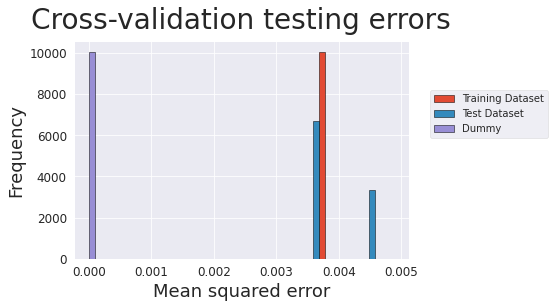

In [28]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.004876, num=50)
hist = cv_xg_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [29]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
xg_boosting_results = pd.DataFrame(['XGBoost', xg_boosting_time, g_xgboosting_param, optuna_xgboost_params, xg_boosting_train_mae, xg_boosting_test_mae, dummy_test_mae, xg_boosting_train_mse, xg_boosting_test_mse, optuna_xgboost_mse, dummy_test_mse, xg_boosting_train_rmse, xg_boosting_test_rmse, optuna_xgboost_rmse, dummy_test_rmse, xg_boosting_train_r2, xg_boosting_test_r2, dummy_test_r2]).transpose()
xg_boosting_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706


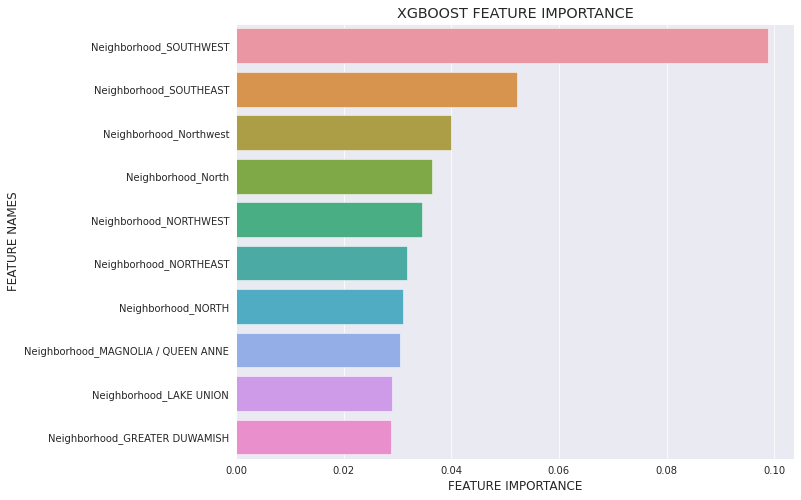

In [30]:
# features importance for xgboost
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(xg_boosting.feature_importances_,X.columns,'XGBOOST')
plt.savefig('xgboostfeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Linear Regression (Lasso)

In [31]:
from sklearn.linear_model import Lasso

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
lasso = Lasso()

# hyperparameters
lasso_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_lasso = GridSearchCV(lasso, param_grid = lasso_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_lasso.fit(X_train, y_train)

#Predict the response for test and train datasets
y_lasso_test_pred = g_lasso.predict(X_test)
y_lasso_train_pred = g_lasso.predict(X_train)

# mean error square
lasso_test_mae = mean_absolute_error(y_test, y_lasso_test_pred)
lasso_train_mae = mean_absolute_error(y_train, y_lasso_train_pred)

# best hyperparameter
g_lasso_param = g_lasso.best_params_

# The mean squared error
lasso_test_mse = mean_squared_error(y_test, y_lasso_test_pred)
lasso_train_mse = mean_squared_error(y_train, y_lasso_train_pred)

# The coefficient of determination: 1 is perfect prediction
lasso_test_r2 = r2_score(y_test, y_lasso_test_pred)
lasso_train_r2 = r2_score(y_train, y_lasso_train_pred)

# The root mean squared error
lasso_test_rmse = sqrt(mean_squared_error(y_test, y_lasso_test_pred))
lasso_train_rmse = sqrt(mean_squared_error(y_train, y_lasso_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso:", lasso_time) 

Elapsed time in seconds to run Lasso: 0.8802051939999274


In [32]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    
    

    ## Create Model
    
    optuna_lasso  = Lasso(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection)
    
    ## Fit Model
    
    optuna_lasso.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lasso.predict(X_test))
    
t1_start = process_time()


study5 = optuna.create_study(study_name="LassoRegression")
study5.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lasso_rmse = sqrt(study5.best_value)
optuna_lasso_mse = study5.best_value
optuna_lasso_params = study5.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters:", lasso_time)

print("Best Params : {}".format(optuna_lasso_params))
print("\nBest MSE : {}".format(optuna_lasso_mse))
print("\nBest RMSE : {}".format(optuna_lasso_rmse))


[I 2022-02-01 10:56:31,598] A new study created in memory with name: LassoRegression
[I 2022-02-01 10:56:31,610] Trial 0 finished with value: 0.0032631129039088482 and parameters: {'fit_intercept': True, 'n_estimators': 513, 'tol': 0.42727209814493433, 'alpha': 213.75161810742028, 'warm_start': False, 'selection': 'random'}. Best is trial 0 with value: 0.0032631129039088482.
[I 2022-02-01 10:56:31,626] Trial 1 finished with value: 4.893407404045306 and parameters: {'fit_intercept': False, 'n_estimators': 402, 'tol': 0.18097999914789203, 'alpha': 700.6249481743405, 'warm_start': False, 'selection': 'random'}. Best is trial 0 with value: 0.0032631129039088482.
[I 2022-02-01 10:56:31,639] Trial 2 finished with value: 0.0032678027283072385 and parameters: {'fit_intercept': True, 'n_estimators': 872, 'tol': 0.15994498244885352, 'alpha': 744.1178550310104, 'warm_start': True, 'selection': 'random'}. Best is trial 0 with value: 0.0032631129039088482.
[I 2022-02-01 10:56:31,651] Trial 3 finish

Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters: 5.598993503999964
Best Params : {'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}

Best MSE : 0.0029521134405671974

Best RMSE : 0.05433335477004156


In [33]:
# cross validation

cv_lasso_train = cross_val_score(g_lasso, X_train, y_lasso_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_test = cross_val_score(g_lasso, X_test, y_lasso_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_results = pd.DataFrame([-cv_lasso_train, -cv_lasso_test, -cv_dummy]).transpose()
cv_lasso_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lasso_results

,Training Dataset,Test Dataset,Dummy
0,0.000012,0.000015,1.972152e-31
1,0.000013,0.000012,1.972152e-31
2,0.000012,0.000013,1.972152e-31
3,0.000016,0.000018,1.972152e-31
4,0.000014,0.000016,1.972152e-31


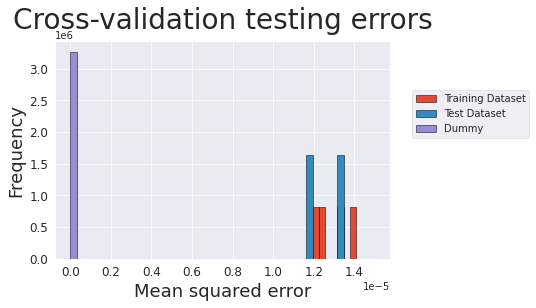

In [34]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.000015, num=50)
hist = cv_lasso_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [35]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lasso_results = pd.DataFrame(['Lasso Regression', lasso_time, g_lasso_param, optuna_lasso_params, lasso_train_mae, lasso_test_mae, dummy_test_mae, lasso_train_mse, lasso_test_mse, optuna_lasso_mse, dummy_test_mse, lasso_train_rmse, lasso_test_rmse, optuna_lasso_rmse, dummy_test_rmse, lasso_train_r2, lasso_test_r2, dummy_test_r2]).transpose()
lasso_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results, lasso_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706
3,Lasso Regression,5.598994,{'alpha': 0.1},"{'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}",0.042475,0.041842,0.057423,0.002924,0.002832,0.002952,0.005189,0.054077,0.053215,0.054333,0.072035,0.506666,0.453880,-0.000706


# Elastic Net

In [36]:
from sklearn.linear_model import ElasticNet

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
elastic_net = ElasticNet()

# hyperparameters
elasticnet_params = {'alpha':(0, 1, 10, 100, 1000, 10000)}

# cross validation to tune hyperparameter
g_elasticnet = GridSearchCV(elastic_net, param_grid = elasticnet_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_elasticnet.fit(X_train, y_train)

#Predict the response for test and train datasets
y_elastic_test_pred = g_elasticnet.predict(X_test)
y_elastic_train_pred = g_elasticnet.predict(X_train)

# mean error square
elastic_test_mae = mean_absolute_error(y_test, y_elastic_test_pred)
elastic_train_mae = mean_absolute_error(y_train, y_elastic_train_pred)

# best hyperparameter
g_elasticnet_param = g_elasticnet.best_params_

# The mean squared error
elastic_test_mse = mean_squared_error(y_test, y_elastic_test_pred)
elastic_train_mse = mean_squared_error(y_train, y_elastic_train_pred)

# The coefficient of determination: 1 is perfect prediction
elastic_test_r2 = r2_score(y_test, y_elastic_test_pred)
elastic_train_r2 = r2_score(y_train, y_elastic_train_pred)

# The root mean squared error
elastic_test_rmse = sqrt(mean_squared_error(y_test, y_elastic_test_pred))
elastic_train_rmse = sqrt(mean_squared_error(y_train, y_elastic_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net:", elastic_time)

Elapsed time in seconds to run Elastic Net: 2.923994246999996


In [37]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    l1_ratio = trial.suggest_float("l1_ratio", 0, 1)
    
    

    ## Create Model

    optuna_elastic  = ElasticNet(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection, l1_ratio=l1_ratio)
    
    
    ## Fit Model
    
    optuna_elastic.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_elastic.predict(X_test))
    
t1_start = process_time()


study6 = optuna.create_study(study_name="ElasticNetRegression")
study6.optimize(objective, n_trials=47)

# evaluation metrics

optuna_elastic_rmse = sqrt(study6.best_value)
optuna_elastic_mse = study6.best_value
optuna_elastic_params = study6.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters:", elastic_time)

print("Best Params : {}".format(optuna_elastic_params))
print("\nBest MSE : {}".format(optuna_elastic_mse))
print("\nBest RMSE : {}".format(optuna_elastic_rmse))


[I 2022-02-01 10:56:38,735] A new study created in memory with name: ElasticNetRegression
[I 2022-02-01 10:56:38,749] Trial 0 finished with value: 1.3326275888930723 and parameters: {'fit_intercept': False, 'n_estimators': 950, 'tol': 0.49752194466033683, 'alpha': 115.87431358449474, 'warm_start': True, 'selection': 'cyclic', 'l1_ratio': 0.2205085808956092}. Best is trial 0 with value: 1.3326275888930723.
[I 2022-02-01 10:56:38,766] Trial 1 finished with value: 0.003245623719012687 and parameters: {'fit_intercept': True, 'n_estimators': 878, 'tol': 0.3313104691814344, 'alpha': 551.276991124876, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.34850912429012537}. Best is trial 1 with value: 0.003245623719012687.
[I 2022-02-01 10:56:38,782] Trial 2 finished with value: 4.893540417079958 and parameters: {'fit_intercept': False, 'n_estimators': 769, 'tol': 0.24800480049680157, 'alpha': 847.9747401525027, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.7874402954212755}. 

Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters: 7.0469769029999725
Best Params : {'fit_intercept': True, 'n_estimators': 871, 'tol': 0.18645781889455337, 'alpha': 123.52706324720053, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.0006050780669651177}

Best MSE : 0.002841294512879856

Best RMSE : 0.05330379454485258


In [38]:
# cross validation

cv_elasticnet_train = cross_val_score(g_elasticnet, X_train, y_elastic_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_test = cross_val_score(g_elasticnet, X_test, y_elastic_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_results = pd.DataFrame([-cv_elasticnet_train, -cv_elasticnet_test, -cv_dummy]).transpose()
cv_elasticnet_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_elasticnet_results

,Training Dataset,Test Dataset,Dummy
0,4.643116e-10,5.606575e-10,1.972152e-31
1,1.547495e-10,6.968913e-10,1.972152e-31
2,5.264688e-11,2.432323e-05,1.972152e-31
3,6.209266e-08,9.216925e-06,1.972152e-31
4,1.007906e-05,1.057461e-07,1.972152e-31


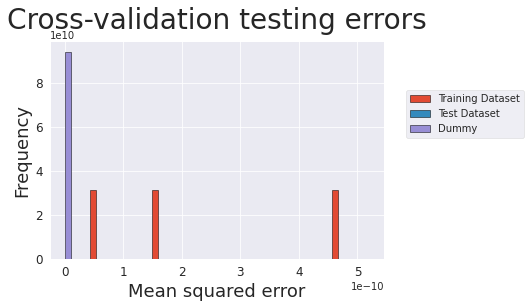

In [39]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=5.202393e-10, num=50)
hist = cv_elasticnet_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [40]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
elastic_results = pd.DataFrame(['Elastic Net Regression', elastic_time, g_elasticnet_param, optuna_elastic_params, elastic_train_mae, elastic_test_mae, dummy_test_mae, elastic_train_mse, elastic_test_mse, optuna_elastic_mse, dummy_test_mse, elastic_train_rmse, elastic_test_rmse, optuna_elastic_rmse, dummy_test_rmse, elastic_train_r2, elastic_test_r2, dummy_test_r2]).transpose()
elastic_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results, lasso_results, elastic_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706
3,Lasso Regression,5.598994,{'alpha': 0.1},"{'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}",0.042475,0.041842,0.057423,0.002924,0.002832,0.002952,0.005189,0.054077,0.053215,0.054333,0.072035,0.506666,0.453880,-0.000706
4,Elastic Net Regression,7.046977,{'alpha': 0},"{'fit_intercept': True, 'n_estimators': 871, 'tol': 0.18645781889455337, 'alpha': 123.52706324720053, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.0006050780669651177}",0.039695,0.041754,0.057423,0.002611,0.002784,0.002841,0.005189,0.051094,0.052760,0.053304,0.072035,0.559599,0.463192,-0.000706


# Linear Regression Model (Simple/Least Squares)

More details here: https://realpython.com/linear-regression-in-python/

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

Simple linear regression is used to estimate the relationship between **two quantitative variables**. 

In [41]:
# We'll start by doing a Linear Regression using one variable to predict our variable TotalGHGEmissions

from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 20)

# start timer
t1_start = process_time()

# call the model
lr = linear_model.LinearRegression()

# train our model
lr.fit(X_train, y_train)

# Predict the response for test and train datasets
y_lr_test_pred = lr.predict(X_test)
y_lr_train_pred = lr.predict(X_train)

# mean error square
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)

# The mean squared error
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)

# The coefficient of determination: 1 is perfect prediction
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# The root mean squared error
lr_test_rmse = sqrt(mean_squared_error(y_test, y_lr_test_pred))
lr_train_rmse = sqrt(mean_squared_error(y_train, y_lr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Least Squares:", lr_time) 

Elapsed time in seconds to run Least Squares: 0.07968489100005627


In [42]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    

    ## Create Model
    
    optuna_lr  = LinearRegression(fit_intercept=fit_intercept)
    
    ## Fit Model
    
    optuna_lr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lr.predict(X_test))
    

t1_start = process_time()


study4 = optuna.create_study(study_name="LinearRegression")
study4.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lr_rmse = sqrt(study4.best_value)
optuna_lr_mse = study4.best_value
optuna_lr_params = study4.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters:", lr_time)

print("Best Params : {}".format(optuna_lr_params))
print("\nBest MSE : {}".format(optuna_lr_mse))
print("\nBest RMSE : {}".format(optuna_lr_rmse))


[I 2022-02-01 10:56:47,412] A new study created in memory with name: LinearRegression
[I 2022-02-01 10:56:47,427] Trial 0 finished with value: 0.0027835710755593135 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.0027835710755593135.
[I 2022-02-01 10:56:47,440] Trial 1 finished with value: 0.0027835710755593135 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.0027835710755593135.
[I 2022-02-01 10:56:47,453] Trial 2 finished with value: 0.0027835710755593135 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.0027835710755593135.
[I 2022-02-01 10:56:47,466] Trial 3 finished with value: 0.0027835710755593135 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.0027835710755593135.
[I 2022-02-01 10:56:47,479] Trial 4 finished with value: 0.0027835710780604694 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.0027835710755593135.
[I 2022-02-01 10:56:47,492] Trial 5 finished with value

Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters: 2.5513450280000143
Best Params : {'fit_intercept': False}

Best MSE : 0.0027835710755593135

Best RMSE : 0.052759559091782725


In [43]:
# cross validation

cv_lr_train = cross_val_score(lr, X_train, y_lr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_test = cross_val_score(lr, X_test, y_lr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_results = pd.DataFrame([-cv_lr_train, -cv_lr_test, -cv_dummy]).transpose()
cv_lr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lr_results

,Training Dataset,Test Dataset,Dummy
0,1.972152e-31,1.204235e-31,1.972152e-31
1,2.048475e-22,7.126406e-06,1.972152e-31
2,6.856373e-07,4.118831e-31,1.972152e-31
3,1.071510e-22,3.410155e-05,1.972152e-31
4,3.678412e-22,8.413884e-06,1.972152e-31


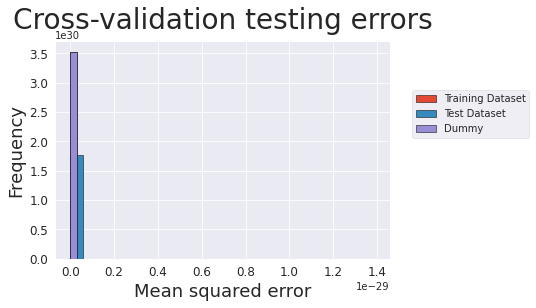

In [44]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=1.389615e-29, num=50)
hist = cv_lr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [45]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lr_results = pd.DataFrame(['Least Squares Regression', lr_time, optuna_lr_params, lr_train_mae, lr_test_mae, dummy_test_mae, lr_train_mse, lr_test_mse, optuna_lr_mse, dummy_test_mse, lr_train_rmse, lr_test_rmse, optuna_lr_rmse, dummy_test_rmse, lr_train_r2, lr_test_r2, dummy_test_r2]).transpose()
lr_results.columns = ['Method', 'Elapsed Time', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results, lasso_results, elastic_results, lr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706
3,Lasso Regression,5.598994,{'alpha': 0.1},"{'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}",0.042475,0.041842,0.057423,0.002924,0.002832,0.002952,0.005189,0.054077,0.053215,0.054333,0.072035,0.506666,0.453880,-0.000706
4,Elastic Net Regression,7.046977,{'alpha': 0},"{'fit_intercept': True, 'n_estimators': 871, 'tol': 0.18645781889455337, 'alpha': 123.52706324720053, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.0006050780669651177}",0.039695,0.041754,0.057423,0.002611,0.002784,0.002841,0.005189,0.051094,0.052760,0.053304,0.072035,0.559599,0.463192,-0.000706
5,Least Squares Regression,2.551345,nan,{'fit_intercept': False},0.039695,0.041754,0.057423,0.002611,0.002784,0.002784,0.005189,0.051094,0.052760,0.052760,0.072035,0.559599,0.463192,-0.000706


# Linear Regression (Ridge)

In [46]:
from sklearn.linear_model import Ridge

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# call the model
ridge = Ridge(random_state = 20)

# hyperparameters
ridge_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_ridge = GridSearchCV(ridge, param_grid = ridge_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_ridge.fit(X_train, y_train)

#Predict the response for test and train datasets
y_ridge_test_pred = g_ridge.predict(X_test)
y_ridge_train_pred = g_ridge.predict(X_train)

# mean error square
ridge_test_mae = mean_absolute_error(y_test, y_ridge_test_pred)
ridge_train_mae = mean_absolute_error(y_train, y_ridge_train_pred)

# best hyperparameter
g_ridge_param = g_ridge.best_params_

# The mean squared error
ridge_test_mse = mean_squared_error(y_test, y_ridge_test_pred)
ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)

# The coefficient of determination: 1 is perfect prediction
ridge_test_r2 = r2_score(y_test, y_ridge_test_pred)
ridge_train_r2 = r2_score(y_train, y_ridge_train_pred)

# The root mean squared error
ridge_test_rmse = sqrt(mean_squared_error(y_test, y_ridge_test_pred))
ridge_train_rmse = sqrt(mean_squared_error(y_train, y_ridge_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge:", ridge_time) 

Elapsed time in seconds to run Ridge: 0.8544805789999828


In [47]:
import optuna

def objective(trial):

    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    solver = trial.suggest_categorical("solver",choices=["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"])
    
    
    ## Create Model

    optuna_ridge  = Ridge(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, solver=solver)
   
    ## Fit Model
    
    optuna_ridge.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_ridge.predict(X_test))
    

t1_start = process_time()


study10 = optuna.create_study(study_name="RidgeRegression")
study10.optimize(objective, n_trials=47)

# evaluation metrics

optuna_ridge_rmse = sqrt(study10.best_value)
optuna_ridge_mse = study10.best_value
optuna_ridge_params = study10.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters:", ridge_time)

print("Best Params : {}".format(optuna_ridge_params))
print("\nBest MSE : {}".format(optuna_ridge_mse))
print("\nBest RMSE : {}".format(optuna_ridge_rmse))


[I 2022-02-01 10:56:51,772] A new study created in memory with name: RidgeRegression
[I 2022-02-01 10:56:51,793] Trial 0 finished with value: 0.003507328546374128 and parameters: {'fit_intercept': True, 'n_estimators': 218, 'tol': 0.019854773505357026, 'alpha': 258.41735649492756, 'solver': 'sag'}. Best is trial 0 with value: 0.003507328546374128.
[I 2022-02-01 10:56:51,808] Trial 1 finished with value: 5.352734499866236 and parameters: {'fit_intercept': False, 'n_estimators': 361, 'tol': 0.2932051641981079, 'alpha': 496.35774516116425, 'solver': 'sparse_cg'}. Best is trial 0 with value: 0.003507328546374128.
[I 2022-02-01 10:56:51,825] Trial 2 finished with value: 6.091791998131323 and parameters: {'fit_intercept': False, 'n_estimators': 475, 'tol': 0.4837376919571082, 'alpha': 933.1825026874975, 'solver': 'sag'}. Best is trial 0 with value: 0.003507328546374128.
[I 2022-02-01 10:56:51,840] Trial 3 finished with value: 0.0030048394059375596 and parameters: {'fit_intercept': True, 'n_e

Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters: 6.006983149999996
Best Params : {'fit_intercept': True, 'n_estimators': 240, 'tol': 0.2698461724406162, 'alpha': 2.3819941622742924, 'solver': 'svd'}

Best MSE : 0.0028579405491320664

Best RMSE : 0.053459709587053185


In [48]:
# cross validation

cv_ridge_train = cross_val_score(g_ridge, X_train, y_ridge_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_test = cross_val_score(g_ridge, X_test, y_ridge_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_results = pd.DataFrame([-cv_ridge_train, -cv_ridge_test, -cv_dummy]).transpose()
cv_ridge_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_ridge_results

,Training Dataset,Test Dataset,Dummy
0,1.127950e-09,3.948136e-10,1.972152e-31
1,1.401398e-10,5.360326e-09,1.972152e-31
2,1.192845e-10,9.959080e-10,1.972152e-31
3,8.812138e-11,1.125025e-09,1.972152e-31
4,1.034388e-10,9.799949e-10,1.972152e-31


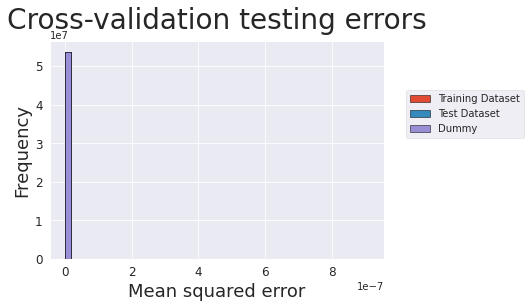

In [49]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=9.119538e-07, num=50)
hist = cv_ridge_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [50]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
ridge_results = pd.DataFrame(['Ridge Regression', ridge_time, g_ridge_param, optuna_ridge_params, ridge_train_mae, ridge_test_mae, dummy_test_mae, ridge_train_mse, ridge_test_mse, optuna_ridge_mse, dummy_test_mse, ridge_train_rmse, ridge_test_rmse, optuna_ridge_rmse, dummy_test_rmse, ridge_train_r2, ridge_test_r2, dummy_test_r2]).transpose()
ridge_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results, lasso_results, elastic_results, lr_results, ridge_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706
3,Lasso Regression,5.598994,{'alpha': 0.1},"{'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}",0.042475,0.041842,0.057423,0.002924,0.002832,0.002952,0.005189,0.054077,0.053215,0.054333,0.072035,0.506666,0.453880,-0.000706
4,Elastic Net Regression,7.046977,{'alpha': 0},"{'fit_intercept': True, 'n_estimators': 871, 'tol': 0.18645781889455337, 'alpha': 123.52706324720053, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.0006050780669651177}",0.039695,0.041754,0.057423,0.002611,0.002784,0.002841,0.005189,0.051094,0.052760,0.053304,0.072035,0.559599,0.463192,-0.000706
5,Least Squares Regression,2.551345,nan,{'fit_intercept': False},0.039695,0.041754,0.057423,0.002611,0.002784,0.002784,0.005189,0.051094,0.052760,0.052760,0.072035,0.559599,0.463192,-0.000706
6,Ridge Regression,6.006983,{'alpha': 100},"{'fit_intercept': True, 'n_estimators': 240, 'tol': 0.2698461724406162, 'alpha': 2.3819941622742924, 'solver': 'svd'}",0.040266,0.040889,0.057423,0.002659,0.002911,0.002858,0.005189,0.051563,0.053952,0.053460,0.072035,0.532851,0.491808,-0.000706


# Support Vector Regression

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.



In [51]:
from sklearn.svm import SVR

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

#call the model
svr = SVR()

# define values for hyperparameters
kernel = ['poly']
degree = [1] # linear
C = [200]

# Create the random grid
svr_grid = {'kernel': kernel, 'degree': degree, 'C': C}

# cross validation to tune hyperparameter
gsvr = GridSearchCV(svr, param_grid = svr_grid, cv=KFold(n_splits=5,shuffle=True))

# train our models with the parameters we indicated
gsvr.fit(X_train, y_train)

#Predict the response for test dataset
y_svr_test_pred = gsvr.predict(X_test)
y_svr_train_pred = gsvr.predict(X_train)

# mean error square
svr_test_mae = mean_absolute_error(y_test, y_svr_test_pred)
svr_train_mae = mean_absolute_error(y_train, y_svr_train_pred)

# best hyperparameter
gsvr_param = gsvr.best_params_

# The mean squared error
svr_test_mse = mean_squared_error(y_test, y_svr_test_pred)
svr_train_mse = mean_squared_error(y_train, y_svr_train_pred)

# The coefficient of determination: 1 is perfect prediction
svr_test_r2 = r2_score(y_test, y_svr_test_pred)
svr_train_r2 = r2_score(y_train, y_svr_train_pred)

# The root mean squared error
svr_test_rmse = sqrt(mean_squared_error(y_test, y_svr_test_pred))
svr_train_rmse = sqrt(mean_squared_error(y_train, y_svr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run SVR:", svr_time) 

Elapsed time in seconds to run SVR: 4.767697287000033


In [52]:
import optuna

def objective(trial):

    gamma = trial.suggest_categorical("gamma", choices=["auto", "scale"])
    verbose = trial.suggest_categorical("verbose", choices=[True, False])
    C = trial.suggest_float("C", 1, 100)
    epsilon = trial.suggest_float("epsilon", 0, 1)
    shrinking = trial.suggest_categorical("shrinking",choices=[True,False]) 

    ## Create Model
    
    optuna_svr = SVR(epsilon=epsilon, gamma=gamma, C=C, shrinking=shrinking, verbose=verbose)
    
    ## Fit Model
    
    optuna_svr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_svr.predict(X_test))
    

t1_start = process_time()


study9 = optuna.create_study(study_name="SupportVectorRegressor")
study9.optimize(objective, n_trials=47)

# evaluation metrics

optuna_svr_rmse = sqrt(study9.best_value)
optuna_svr_mse = study9.best_value
optuna_svr_params = study9.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters:", svr_time)

print("Best Params : {}".format(optuna_svr_params))
print("\nBest MSE : {}".format(optuna_svr_mse))
print("\nBest RMSE : {}".format(optuna_svr_rmse))


[I 2022-02-01 10:57:03,725] A new study created in memory with name: SupportVectorRegressor
[I 2022-02-01 10:57:03,733] Trial 0 finished with value: 0.006826538626387684 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 72.35362771621807, 'epsilon': 0.7576021228193633, 'shrinking': True}. Best is trial 0 with value: 0.006826538626387684.
[I 2022-02-01 10:57:03,742] Trial 1 finished with value: 0.006826538626387684 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 55.532732053482974, 'epsilon': 0.5137292242919989, 'shrinking': False}. Best is trial 0 with value: 0.006826538626387684.
[I 2022-02-01 10:57:03,750] Trial 2 finished with value: 0.006826538626387684 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 78.83645509164278, 'epsilon': 0.9647562802762383, 'shrinking': False}. Best is trial 0 with value: 0.006826538626387684.


[LibSVM]*
optimization finished, #iter = 0
obj = 0.000000, rho = -2.725477
nSV = 0, nBSV = 0
[LibSVM]*
optimization finished, #iter = 0
obj = 0.000000, rho = -2.725477
nSV = 0, nBSV = 0
[LibSVM].*
optimization finished, #iter = 1115
obj = -2.069518, rho = -2.687850
nSV = 944, nBSV = 0


[I 2022-02-01 10:57:03,945] Trial 3 finished with value: 0.005132520665515236 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 58.908929284422406, 'epsilon': 0.02841326802772204, 'shrinking': False}. Best is trial 3 with value: 0.005132520665515236.
[I 2022-02-01 10:57:03,958] Trial 4 finished with value: 0.006053727857657838 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 27.529065614205653, 'epsilon': 0.19424560054968332, 'shrinking': True}. Best is trial 3 with value: 0.005132520665515236.
[I 2022-02-01 10:57:03,967] Trial 5 finished with value: 0.0045535212495073744 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 74.34303074741185, 'epsilon': 0.2399413561128776, 'shrinking': True}. Best is trial 5 with value: 0.0045535212495073744.
[I 2022-02-01 10:57:03,975] Trial 6 finished with value: 0.006826538626387684 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 75.18865459717703, 'epsilon': 0.5137039128224247, 'shrinking': False}. Best is trial 5 with v

[LibSVM]*
optimization finished, #iter = 0
obj = 0.000000, rho = -2.725477
nSV = 0, nBSV = 0
[LibSVM]*
optimization finished, #iter = 0
obj = 0.000000, rho = -2.725477
nSV = 0, nBSV = 0
[LibSVM]

[I 2022-02-01 10:57:04,285] Trial 11 finished with value: 0.0051155146831242185 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 56.94864339480269, 'epsilon': 0.0034390477323184253, 'shrinking': True}. Best is trial 5 with value: 0.0045535212495073744.


*.*
optimization finished, #iter = 1546
obj = -3.595756, rho = -2.684182
nSV = 1259, nBSV = 0
[LibSVM]

[I 2022-02-01 10:57:04,530] Trial 12 finished with value: 0.005118307306520397 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 97.63300550043245, 'epsilon': 0.012935991231823304, 'shrinking': True}. Best is trial 5 with value: 0.0045535212495073744.
[I 2022-02-01 10:57:04,577] Trial 13 finished with value: 0.0021245358334672664 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 46.157183194617026, 'epsilon': 0.15058388082429647, 'shrinking': True}. Best is trial 13 with value: 0.0021245358334672664.
[I 2022-02-01 10:57:04,636] Trial 14 finished with value: 0.0023114663920280588 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 45.37485461073262, 'epsilon': 0.1604523258408438, 'shrinking': True}. Best is trial 13 with value: 0.0021245358334672664.
[I 2022-02-01 10:57:04,653] Trial 15 finished with value: 0.006826538626387684 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 42.992162460117314, 'epsilon': 0.381909341620434, 'shrinking': True}. Best is trial

*.*
optimization finished, #iter = 1345
obj = -2.934506, rho = -2.685396
nSV = 1119, nBSV = 0


[I 2022-02-01 10:57:04,736] Trial 16 finished with value: 0.002232967166006203 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 18.13135215078334, 'epsilon': 0.09781775300588241, 'shrinking': True}. Best is trial 13 with value: 0.0021245358334672664.
[I 2022-02-01 10:57:04,787] Trial 17 finished with value: 0.0022147978091634868 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 11.238563554345907, 'epsilon': 0.11857537553340478, 'shrinking': True}. Best is trial 13 with value: 0.0021245358334672664.
[I 2022-02-01 10:57:04,804] Trial 18 finished with value: 0.006826538626387684 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 2.940064077590513, 'epsilon': 0.39625662991719846, 'shrinking': True}. Best is trial 13 with value: 0.0021245358334672664.
[I 2022-02-01 10:57:04,830] Trial 19 finished with value: 0.0021434055463961346 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 16.05266604576249, 'epsilon': 0.15336786897632995, 'shrinking': True}. Best is t

[LibSVM]*
optimization finished, #iter = 0
obj = 0.000000, rho = -2.725477
nSV = 0, nBSV = 0


[I 2022-02-01 10:57:07,580] Trial 38 finished with value: 0.0021282013276521707 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 40.87545346487887, 'epsilon': 0.04046936443697031, 'shrinking': False}. Best is trial 31 with value: 0.002039392868586422.
[I 2022-02-01 10:57:07,720] Trial 39 finished with value: 0.002075096564531542 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 59.64513152676743, 'epsilon': 0.06261183332142564, 'shrinking': True}. Best is trial 31 with value: 0.002039392868586422.


[LibSVM]........*.......*
optimization finished, #iter = 15750
obj = -245.512750, rho = -2.761731
nSV = 139, nBSV = 106
[LibSVM]

[I 2022-02-01 10:57:07,843] Trial 40 finished with value: 0.005262183134785193 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 59.479556964514565, 'epsilon': 0.06627869465969402, 'shrinking': True}. Best is trial 31 with value: 0.002039392868586422.


*
optimization finished, #iter = 598
obj = -0.800823, rho = -2.695832
nSV = 556, nBSV = 0
[LibSVM].....

[I 2022-02-01 10:57:08,449] Trial 41 finished with value: 0.002078693048922954 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 46.42031703708261, 'epsilon': 0.0025728196969349026, 'shrinking': True}. Best is trial 31 with value: 0.002039392868586422.


.........
*.............*...*
optimization finished, #iter = 30327
obj = -1655.939005, rho = -2.755546
nSV = 1231, nBSV = 1176
[LibSVM].........

[I 2022-02-01 10:57:09,026] Trial 42 finished with value: 0.0021506618417293628 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 53.334669706363606, 'epsilon': 0.00811719342293766, 'shrinking': True}. Best is trial 31 with value: 0.002039392868586422.
[I 2022-02-01 10:57:09,047] Trial 43 finished with value: 0.006826538626387684 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 38.399720705817856, 'epsilon': 0.6008561189128262, 'shrinking': True}. Best is trial 31 with value: 0.002039392868586422.
[I 2022-02-01 10:57:09,067] Trial 44 finished with value: 0.003990827710197443 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 30.520210059749218, 'epsilon': 0.2294437337204154, 'shrinking': True}. Best is trial 31 with value: 0.002039392868586422.


........
*..................*.
*
optimization finished, #iter = 36103
obj = -1568.818869, rho = -2.752701
nSV = 1074, nBSV = 1019
[LibSVM]*
optimization finished, #iter = 0
obj = 0.000000, rho = -2.725477
nSV = 0, nBSV = 0
[LibSVM]*
optimization finished, #iter = 3
obj = -0.001679, rho = -2.733403
nSV = 4, nBSV = 0
[LibSVM].................

[I 2022-02-01 10:57:10,073] Trial 45 finished with value: 0.0021989249568530223 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 80.16101892747177, 'epsilon': 0.05555054634693156, 'shrinking': False}. Best is trial 31 with value: 0.002039392868586422.


.*
optimization finished, #iter = 18542
obj = -403.556047, rho = -2.735553
nSV = 179, nBSV = 142
[LibSVM]

[I 2022-02-01 10:57:10,307] Trial 46 finished with value: 0.005122112137141398 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 59.995698512031844, 'epsilon': 0.018291045802219685, 'shrinking': True}. Best is trial 31 with value: 0.002039392868586422.


*.*
optimization finished, #iter = 1240
obj = -2.607207, rho = -2.686164
nSV = 1059, nBSV = 0
Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters: 6.677167621999956
Best Params : {'gamma': 'scale', 'verbose': False, 'C': 49.527623258941, 'epsilon': 0.05974078259205741, 'shrinking': True}

Best MSE : 0.002039392868586422

Best RMSE : 0.04515963760468436


In [53]:
# cross validation

cv_svr_train = cross_val_score(gsvr, X_train, y_svr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_test = cross_val_score(gsvr, X_test, y_svr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_results = pd.DataFrame([-cv_svr_train, -cv_svr_test, -cv_dummy]).transpose()
cv_svr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_svr_results

,Training Dataset,Test Dataset,Dummy
0,0.008437,0.008175,1.972152e-31
1,0.008505,0.008400,1.972152e-31
2,0.008470,0.008041,1.972152e-31
3,0.008570,0.008355,1.972152e-31
4,0.008674,0.007945,1.972152e-31


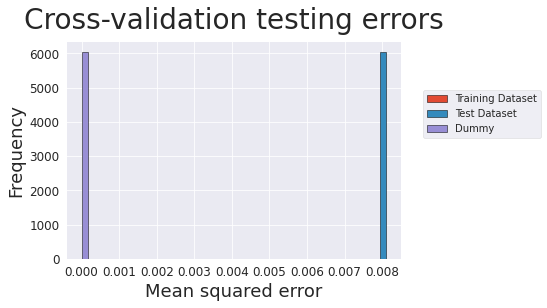

In [54]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.008098, num=50)
hist = cv_svr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [55]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
svr_results = pd.DataFrame(['SVR', svr_time, gsvr_param, optuna_svr_params, svr_train_mae, svr_test_mae, dummy_test_mae, svr_train_mse, svr_test_mse, optuna_svr_mse, dummy_test_mse, svr_train_rmse, svr_test_rmse, optuna_svr_rmse, dummy_test_rmse,  svr_train_r2, svr_test_r2, dummy_test_r2]).transpose()
svr_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results, lasso_results, elastic_results, lr_results, ridge_results, svr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706
3,Lasso Regression,5.598994,{'alpha': 0.1},"{'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}",0.042475,0.041842,0.057423,0.002924,0.002832,0.002952,0.005189,0.054077,0.053215,0.054333,0.072035,0.506666,0.453880,-0.000706
4,Elastic Net Regression,7.046977,{'alpha': 0},"{'fit_intercept': True, 'n_estimators': 871, 'tol': 0.18645781889455337, 'alpha': 123.52706324720053, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.0006050780669651177}",0.039695,0.041754,0.057423,0.002611,0.002784,0.002841,0.005189,0.051094,0.052760,0.053304,0.072035,0.559599,0.463192,-0.000706
5,Least Squares Regression,2.551345,nan,{'fit_intercept': False},0.039695,0.041754,0.057423,0.002611,0.002784,0.002784,0.005189,0.051094,0.052760,0.052760,0.072035,0.559599,0.463192,-0.000706
6,Ridge Regression,6.006983,{'alpha': 100},"{'fit_intercept': True, 'n_estimators': 240, 'tol': 0.2698461724406162, 'alpha': 2.3819941622742924, 'solver': 'svd'}",0.040266,0.040889,0.057423,0.002659,0.002911,0.002858,0.005189,0.051563,0.053952,0.053460,0.072035,0.532851,0.491808,-0.000706
7,SVR,6.677168,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 49.527623258941, 'epsilon': 0.05974078259205741, 'shrinking': True}",0.047853,0.045524,0.057423,0.003533,0.003279,0.002039,0.005189,0.059441,0.057259,0.045160,0.072035,0.403937,0.367718,-0.000706


# Bagging for Regression

In [56]:
from sklearn.ensemble import BaggingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a RF classifier
reg_bagging = BaggingRegressor() 

# define values for hyperparameters
n_estimators = [200]
max_features = [30]
max_samples = [100]

# Create the random grid
rbag_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_samples':max_samples}

# cross validation to tune hyperparameter
g_rbag = GridSearchCV(reg_bagging, param_grid = rbag_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
reg_bagging.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_reg_bagging_test_pred = reg_bagging.predict(X_test)
y_reg_bagging_train_pred = reg_bagging.predict(X_train)

# fit the grid
g_rbag.fit(X_train, y_train)

# best hyperparameter
g_rbag_param = g_rbag.best_params_

# The mean absolute error
reg_bagging_test_mae = mean_absolute_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mae = mean_absolute_error(y_train, y_reg_bagging_train_pred)

# The mean squared error
reg_bagging_test_mse = mean_squared_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mse = mean_squared_error(y_train, y_reg_bagging_train_pred)

# The coefficient of determination: 1 is perfect prediction
reg_bagging_test_r2 = r2_score(y_test, y_reg_bagging_test_pred)
reg_bagging_train_r2 = r2_score(y_train, y_reg_bagging_train_pred)

# The root mean squared error
reg_bagging_test_rmse = sqrt(mean_squared_error(y_test, y_reg_bagging_test_pred))
reg_bagging_train_rmse = sqrt(mean_squared_error(y_train, y_reg_bagging_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rbagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor:", rbagging_time)

Elapsed time in seconds to run Bagging Regressor: 3.3718773420000616


In [57]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 200)
    max_features = trial.suggest_int("max_features", 1, 30)
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False])
    bootstrap_features = trial.suggest_categorical("bootstrap_features",choices=[True, False])
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    

    ## Create Model
    
    optuna_bagging  = BaggingRegressor(n_estimators=n_estimators, max_features=max_features, max_samples=max_samples, bootstrap=bootstrap, bootstrap_features=bootstrap_features, warm_start=warm_start)
    
    ## Fit Model
    
    optuna_bagging.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_bagging.predict(X_test))
    

t1_start = process_time()


study3 = optuna.create_study(study_name="BaggingRegressor")
study3.optimize(objective, n_trials=47)

# evaluation metrics

optuna_bagging_rmse = sqrt(study3.best_value)
optuna_bagging_mse = study3.best_value
optuna_bagging_params = study3.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
bagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters:", bagging_time)

print("Best Params : {}".format(optuna_bagging_params))
print("\nBest MSE : {}".format(optuna_bagging_mse))
print("\nBest RMSE : {}".format(optuna_bagging_rmse))


[I 2022-02-01 10:57:17,758] A new study created in memory with name: BaggingRegressor
[I 2022-02-01 10:57:17,917] Trial 0 finished with value: 0.004269589930618549 and parameters: {'n_estimators': 66, 'max_features': 3, 'max_samples': 77, 'bootstrap': True, 'bootstrap_features': False, 'warm_start': False}. Best is trial 0 with value: 0.004269589930618549.
[I 2022-02-01 10:57:18,117] Trial 1 finished with value: 0.0020198626100560147 and parameters: {'n_estimators': 73, 'max_features': 27, 'max_samples': 86, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': True}. Best is trial 1 with value: 0.0020198626100560147.
[I 2022-02-01 10:57:18,187] Trial 2 finished with value: 0.002988234477652407 and parameters: {'n_estimators': 27, 'max_features': 8, 'max_samples': 68, 'bootstrap': True, 'bootstrap_features': False, 'warm_start': False}. Best is trial 1 with value: 0.0020198626100560147.
[I 2022-02-01 10:57:18,307] Trial 3 finished with value: 0.0043270356885395 and parameters:

Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters: 10.556374935000008
Best Params : {'n_estimators': 90, 'max_features': 29, 'max_samples': 95, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': True}

Best MSE : 0.0017532239220820205

Best RMSE : 0.041871516835218905


In [58]:
# cross validation

cv_bagging_train = cross_val_score(g_rbag, X_train, y_reg_bagging_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_test = cross_val_score(g_rbag, X_test, y_reg_bagging_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_results = pd.DataFrame([-cv_bagging_train, -cv_bagging_test, -cv_dummy]).transpose()
cv_bagging_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_bagging_results

,Training Dataset,Test Dataset,Dummy
0,0.000998,0.000869,1.972152e-31
1,0.001089,0.000712,1.972152e-31
2,0.001143,0.000818,1.972152e-31
3,0.001182,0.000746,1.972152e-31
4,0.001243,0.000812,1.972152e-31


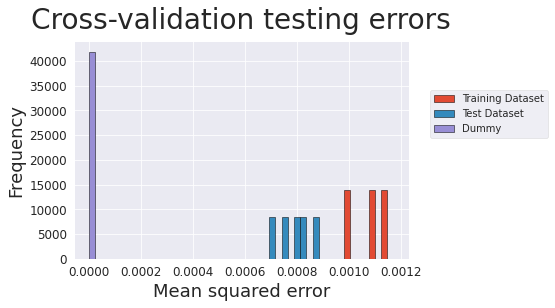

In [59]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.001171, num=50)
hist = cv_bagging_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [60]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
bagging_results = pd.DataFrame(['Bagging Regressor', rbagging_time, g_rbag_param, optuna_bagging_params, reg_bagging_train_mae, reg_bagging_test_mae, dummy_test_mae, reg_bagging_train_mse, reg_bagging_test_mse, optuna_bagging_mse, dummy_test_mse, reg_bagging_train_rmse, reg_bagging_test_rmse, optuna_bagging_rmse, dummy_test_rmse, reg_bagging_train_r2, reg_bagging_test_r2, dummy_test_r2]).transpose()
bagging_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results, lasso_results, elastic_results, lr_results, ridge_results, svr_results, bagging_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706
3,Lasso Regression,5.598994,{'alpha': 0.1},"{'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}",0.042475,0.041842,0.057423,0.002924,0.002832,0.002952,0.005189,0.054077,0.053215,0.054333,0.072035,0.506666,0.453880,-0.000706
4,Elastic Net Regression,7.046977,{'alpha': 0},"{'fit_intercept': True, 'n_estimators': 871, 'tol': 0.18645781889455337, 'alpha': 123.52706324720053, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.0006050780669651177}",0.039695,0.041754,0.057423,0.002611,0.002784,0.002841,0.005189,0.051094,0.052760,0.053304,0.072035,0.559599,0.463192,-0.000706
5,Least Squares Regression,2.551345,nan,{'fit_intercept': False},0.039695,0.041754,0.057423,0.002611,0.002784,0.002784,0.005189,0.051094,0.052760,0.052760,0.072035,0.559599,0.463192,-0.000706
6,Ridge Regression,6.006983,{'alpha': 100},"{'fit_intercept': True, 'n_estimators': 240, 'tol': 0.2698461724406162, 'alpha': 2.3819941622742924, 'solver': 'svd'}",0.040266,0.040889,0.057423,0.002659,0.002911,0.002858,0.005189,0.051563,0.053952,0.053460,0.072035,0.532851,0.491808,-0.000706
7,SVR,6.677168,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 49.527623258941, 'epsilon': 0.05974078259205741, 'shrinking': True}",0.047853,0.045524,0.057423,0.003533,0.003279,0.002039,0.005189,0.059441,0.057259,0.045160,0.072035,0.403937,0.367718,-0.000706
8,Bagging Regressor,3.371877,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 90, 'max_features': 29, 'max_samples': 95, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': True}",0.011893,0.030154,0.057423,0.000308,0.001666,0.001753,0.005189,0.017554,0.040814,0.041872,0.072035,0.948016,0.678763,-0.000706


# Gradient Boosting

We're going to use two cross-validation methods to define our hyperparameters. To define metrics on our training set we'll use GridSearchCV and for our test set, we'll use **Optuna** library.

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
grad_boosting = GradientBoostingRegressor(validation_fraction=0.2, n_iter_no_change=5, tol=0.01) # creation of early stopping to avoid future overfitting in our model

# define values for hyperparameters
learning_rate = [0.6, 0.75, 0.8]
n_estimators = [20]
max_features = [12]
alpha = [0.85]
max_leaf_nodes = [20]
min_samples_leaf = [4]
min_weight_fraction_leaf = [0.39]
max_depth = [7]
min_impurity_decrease = [0.5]

# Create the random grid
gboosting_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_features': max_features, 'alpha': alpha, 'max_leaf_nodes':max_leaf_nodes, 'min_samples_leaf':min_samples_leaf, 'min_weight_fraction_leaf':min_weight_fraction_leaf, 'max_depth':max_depth, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_boosting = GridSearchCV(grad_boosting, param_grid = gboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
grad_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_grad_boosting_test_pred = grad_boosting.predict(X_test)
y_grad_boosting_train_pred = grad_boosting.predict(X_train)

# fit the grid
g_boosting.fit(X_train, y_train)

# best hyperparameter
g_boosting_param = g_boosting.best_params_

# The mean absolute error
grad_boosting_test_mae = mean_absolute_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mae = mean_absolute_error(y_train, y_grad_boosting_train_pred)

# The mean squared error
grad_boosting_test_mse = mean_squared_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mse = mean_squared_error(y_train, y_grad_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
grad_boosting_test_r2 = r2_score(y_test, y_grad_boosting_test_pred)
grad_boosting_train_r2 = r2_score(y_train, y_grad_boosting_train_pred)

# The root mean squared error
grad_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_grad_boosting_test_pred))
grad_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_grad_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor:", grad_boosting_time)

Elapsed time in seconds to run Gradient Boosting Regressor: 0.1649642390000281


In [62]:
import optuna

def objective(trial):
    
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    alpha = trial.suggest_float("alpha", 0, 1)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    validation_fraction= trial.suggest_float("validation_fraction", 0.1, 1)
    n_iter_no_change= trial.suggest_int("n_iter_no_change", 0.1, 25)
    tol= trial.suggest_float("tol", 0.1, 10)
    

    ## Create Model
    
    optuna_grad_boosting  = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_features=max_features, alpha=alpha, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, validation_fraction=validation_fraction, n_iter_no_change=n_iter_no_change, tol=tol)
    
    ## Fit Model
    
    optuna_grad_boosting.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_grad_boosting.predict(X_test))
    

t1_start = process_time()


study1 = optuna.create_study(study_name="GradientBoostingRegressor")
study1.optimize(objective, n_trials=47)

# evaluation metrics

optuna_grad_boosting_rmse = sqrt(study1.best_value)
optuna_grad_boosting_mse = study1.best_value
optuna_grad_boosting_params = study1.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters:", grad_boosting_time)

print("Best Params : {}".format(optuna_grad_boosting_params))
print("\nBest MSE : {}".format(optuna_grad_boosting_mse))
print("\nBest RMSE : {}".format(optuna_grad_boosting_rmse))


[I 2022-02-01 10:58:03,772] A new study created in memory with name: GradientBoostingRegressor
[I 2022-02-01 10:58:03,787] Trial 0 finished with value: 0.0036859135547655172 and parameters: {'learning_rate': 0.4091617110746334, 'n_estimators': 13, 'max_features': 9, 'alpha': 0.7594093820365119, 'max_leaf_nodes': 18, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.16486155437762934, 'max_depth': 5, 'min_impurity_decrease': 0.17876687191152074, 'validation_fraction': 0.7608451839786383, 'n_iter_no_change': 3, 'tol': 0.9384915204749132}. Best is trial 0 with value: 0.0036859135547655172.
[I 2022-02-01 10:58:03,800] Trial 1 finished with value: 0.0034378052337205515 and parameters: {'learning_rate': 0.6266958094990104, 'n_estimators': 13, 'max_features': 20, 'alpha': 0.7979795674828593, 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.031082749387851438, 'max_depth': 10, 'min_impurity_decrease': 0.3344134227044061, 'validation_fraction': 0.8453236747118051, 'n

Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters: 2.5619814210000413
Best Params : {'learning_rate': 0.3451949242375634, 'n_estimators': 57, 'max_features': 17, 'alpha': 0.4835695917539184, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.050374006381031566, 'max_depth': 1, 'min_impurity_decrease': 0.035666577717462886, 'validation_fraction': 0.10314980515622016, 'n_iter_no_change': 16, 'tol': 7.759389652880838}

Best MSE : 0.0018596840820419274

Best RMSE : 0.04312405456403569


In [63]:
# cross validation

cv_grad_boosting_train = cross_val_score(grad_boosting, X_train, y_grad_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_test = cross_val_score(grad_boosting, X_test, y_grad_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_results = pd.DataFrame([-cv_grad_boosting_train, -cv_grad_boosting_test, -cv_dummy]).transpose()
cv_grad_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_grad_boosting_results

,Training Dataset,Test Dataset,Dummy
0,0.000282,0.000222,1.972152e-31
1,0.000266,0.000237,1.972152e-31
2,0.000267,0.000200,1.972152e-31
3,0.000246,0.000213,1.972152e-31
4,0.000240,0.000285,1.972152e-31


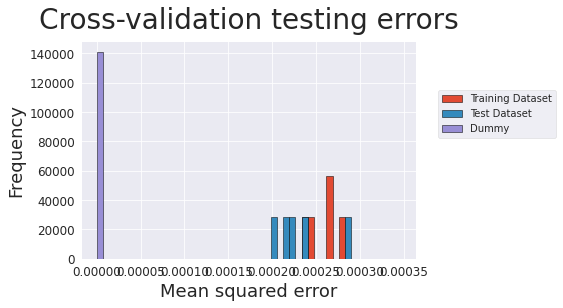

In [64]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.000347, num=50)
hist = cv_grad_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [65]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
grad_boosting_results = pd.DataFrame(['Gradient Boosting', grad_boosting_time, g_boosting_param, optuna_grad_boosting_params, grad_boosting_train_mae, grad_boosting_test_mae, dummy_test_mae, grad_boosting_train_mse, grad_boosting_test_mse, optuna_grad_boosting_mse, dummy_test_mse, grad_boosting_train_rmse, grad_boosting_test_rmse, optuna_grad_boosting_rmse, dummy_test_rmse, grad_boosting_train_r2, grad_boosting_test_r2, dummy_test_r2]).transpose()
grad_boosting_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([tree_results, rf_results, xg_boosting_results, lasso_results, elastic_results, lr_results, ridge_results, svr_results, bagging_results, grad_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Decision Trees Regressor,0.054747,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.2640124477011319, 'max_depth': 3, 'min_impurity_decrease': 0.1316479089692959, 'splitter': 'random', 'min_samples_split': 4}",0.000000,0.037986,0.057423,0.000000,0.002532,0.005189,0.005189,0.000000,0.050319,0.072035,0.072035,1.000000,0.511699,-0.000706
1,Random Forest,6.164329,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 26, 'max_features': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.15055231310041836, 'max_depth': 14, 'min_impurity_decrease': 0.6491949491533444, 'min_samples_split': 9, 'max_samples': 100, 'bootstrap': True}",0.010846,0.028959,0.057423,0.000228,0.001524,0.005185,0.005189,0.015090,0.039035,0.072010,0.072035,0.961586,0.706146,-0.000706
2,XGBoost,15.207185,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}","{'colsample_bylevel': 0.5916856794376022, 'colsample_bytree': 0.9984356555884584, 'booster': 'gblinear', 'gamma': 287.52095237049554, 'learning_rate': 0.9675579430104685, 'max_delta_step': 866.9861911957338, 'max_depth': 1, 'min_child_weights': 7.662494752068097, 'n_estimators': 1867, 'reg_alpha': 6.509126506332848, 'reg_lambda': 81.30148378847596}",0.008031,0.031281,0.057423,0.000129,0.001720,0.003155,0.005189,0.011348,0.041468,0.056168,0.072035,0.978275,0.668385,-0.000706
3,Lasso Regression,5.598994,{'alpha': 0.1},"{'fit_intercept': True, 'n_estimators': 317, 'tol': 0.05383480628461428, 'alpha': 0.34402177030106174, 'warm_start': True, 'selection': 'cyclic'}",0.042475,0.041842,0.057423,0.002924,0.002832,0.002952,0.005189,0.054077,0.053215,0.054333,0.072035,0.506666,0.453880,-0.000706
4,Elastic Net Regression,7.046977,{'alpha': 0},"{'fit_intercept': True, 'n_estimators': 871, 'tol': 0.18645781889455337, 'alpha': 123.52706324720053, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.0006050780669651177}",0.039695,0.041754,0.057423,0.002611,0.002784,0.002841,0.005189,0.051094,0.052760,0.053304,0.072035,0.559599,0.463192,-0.000706
5,Least Squares Regression,2.551345,nan,{'fit_intercept': False},0.039695,0.041754,0.057423,0.002611,0.002784,0.002784,0.005189,0.051094,0.052760,0.052760,0.072035,0.559599,0.463192,-0.000706
6,Ridge Regression,6.006983,{'alpha': 100},"{'fit_intercept': True, 'n_estimators': 240, 'tol': 0.2698461724406162, 'alpha': 2.3819941622742924, 'solver': 'svd'}",0.040266,0.040889,0.057423,0.002659,0.002911,0.002858,0.005189,0.051563,0.053952,0.053460,0.072035,0.532851,0.491808,-0.000706
7,SVR,6.677168,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 49.527623258941, 'epsilon': 0.05974078259205741, 'shrinking': True}",0.047853,0.045524,0.057423,0.003533,0.003279,0.002039,0.005189,0.059441,0.057259,0.045160,0.072035,0.403937,0.367718,-0.000706
8,Bagging Regressor,3.371877,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 90, 'max_features': 29, 'max_samples': 95, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': True}",0.011893,0.030154,0.057423,0.000308,0.001666,0.001753,0.005189,0.017554,0.040814,0.041872,0.072035,0.948016,0.678763,-0.000706
9,Gradient Boosting,2.561981,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.345194924237

[0.01543185 0.91833028 0.06623787 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


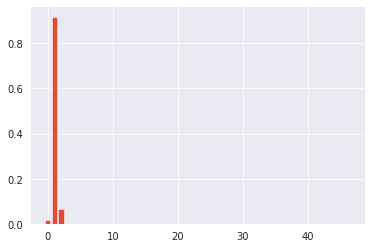

In [66]:
print(grad_boosting.feature_importances_)
plt.bar(range(len(grad_boosting.feature_importances_)), grad_boosting.feature_importances_)
plt.show()

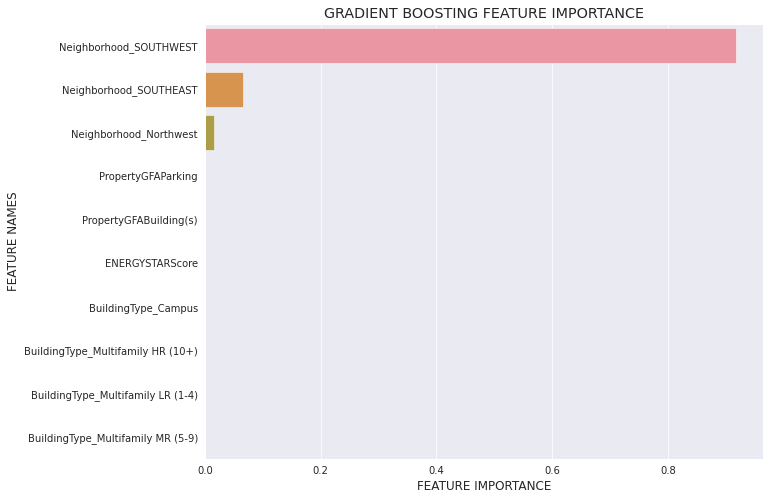

In [67]:
# plot features importance for Gradient Boosting

plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(grad_boosting.feature_importances_,X.columns,'GRADIENT BOOSTING')
plt.savefig('gradboostfeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Statistical Results

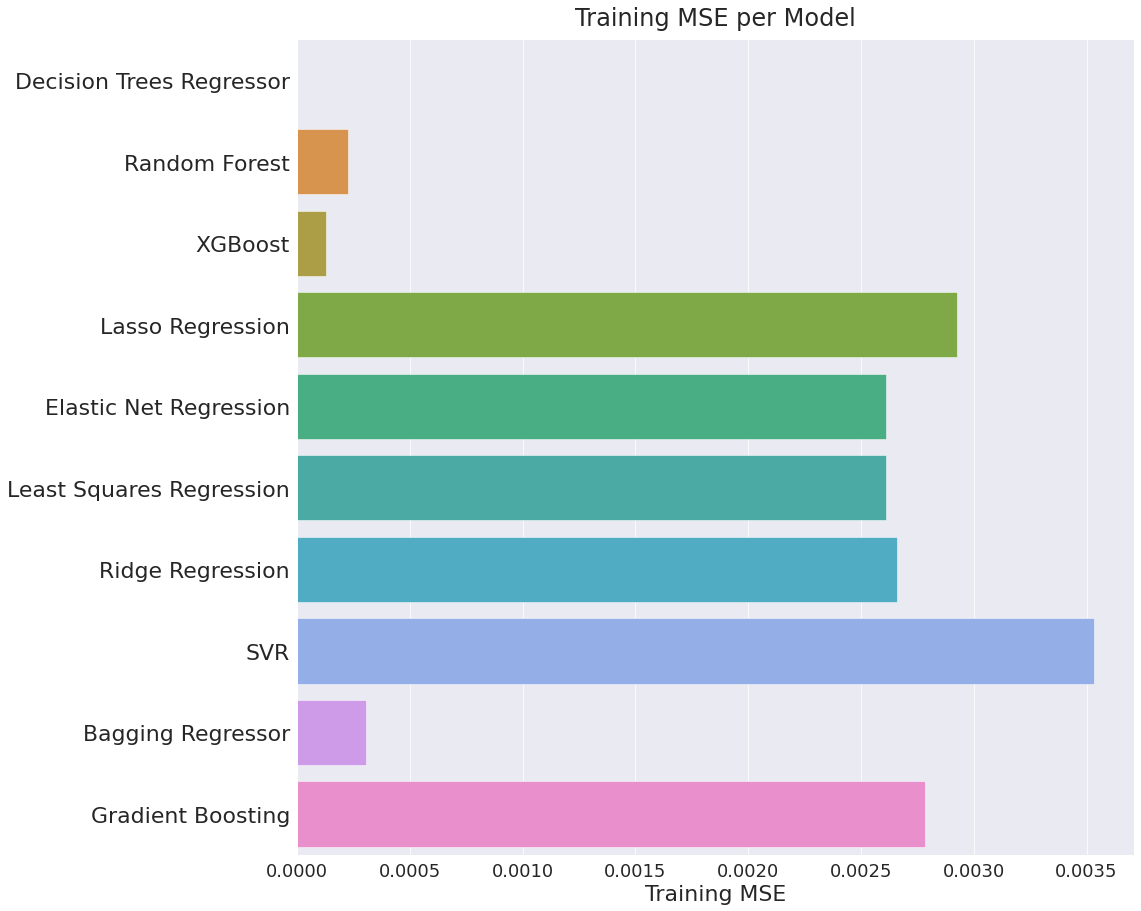

In [68]:
# Training MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training MSE per Model", size=24, y=1.01)
plt.xlabel("Training MSE", size=22)
plt.savefig('msetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

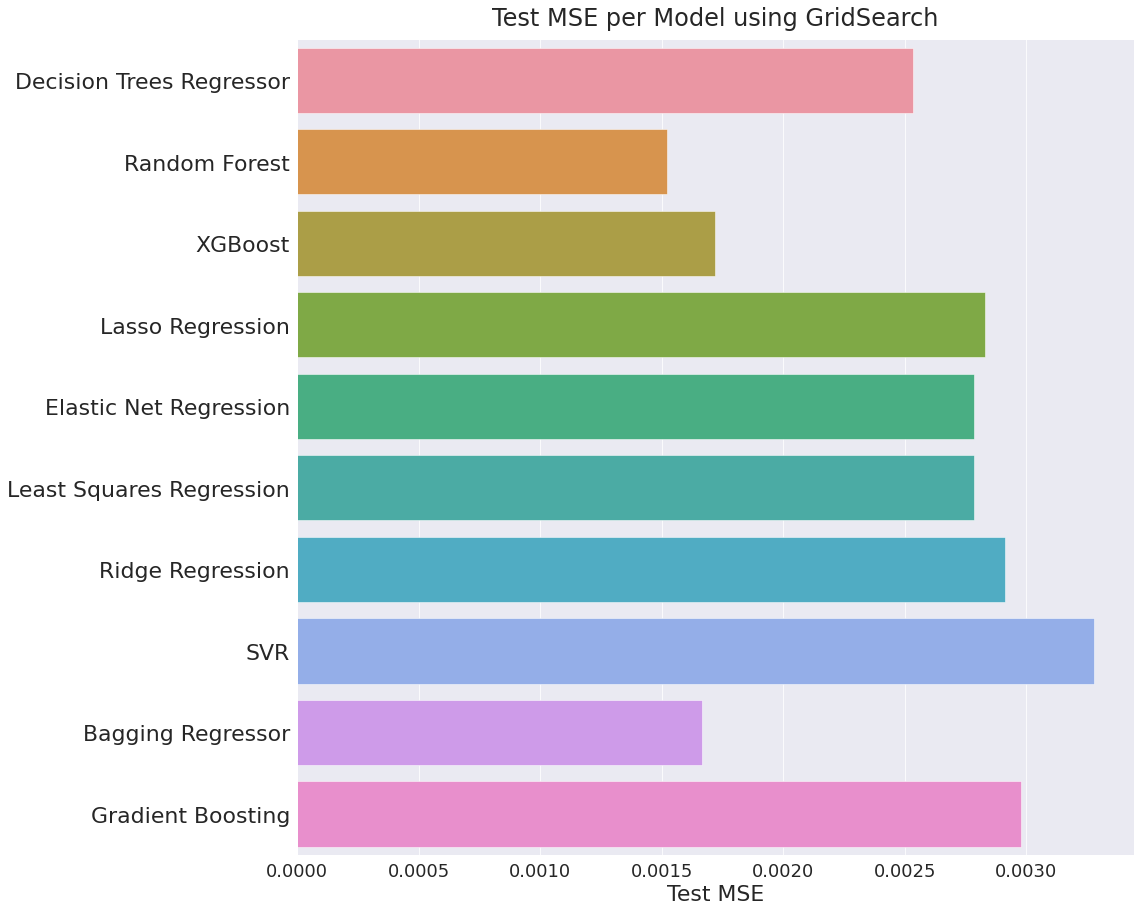

In [69]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using GridSearch", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

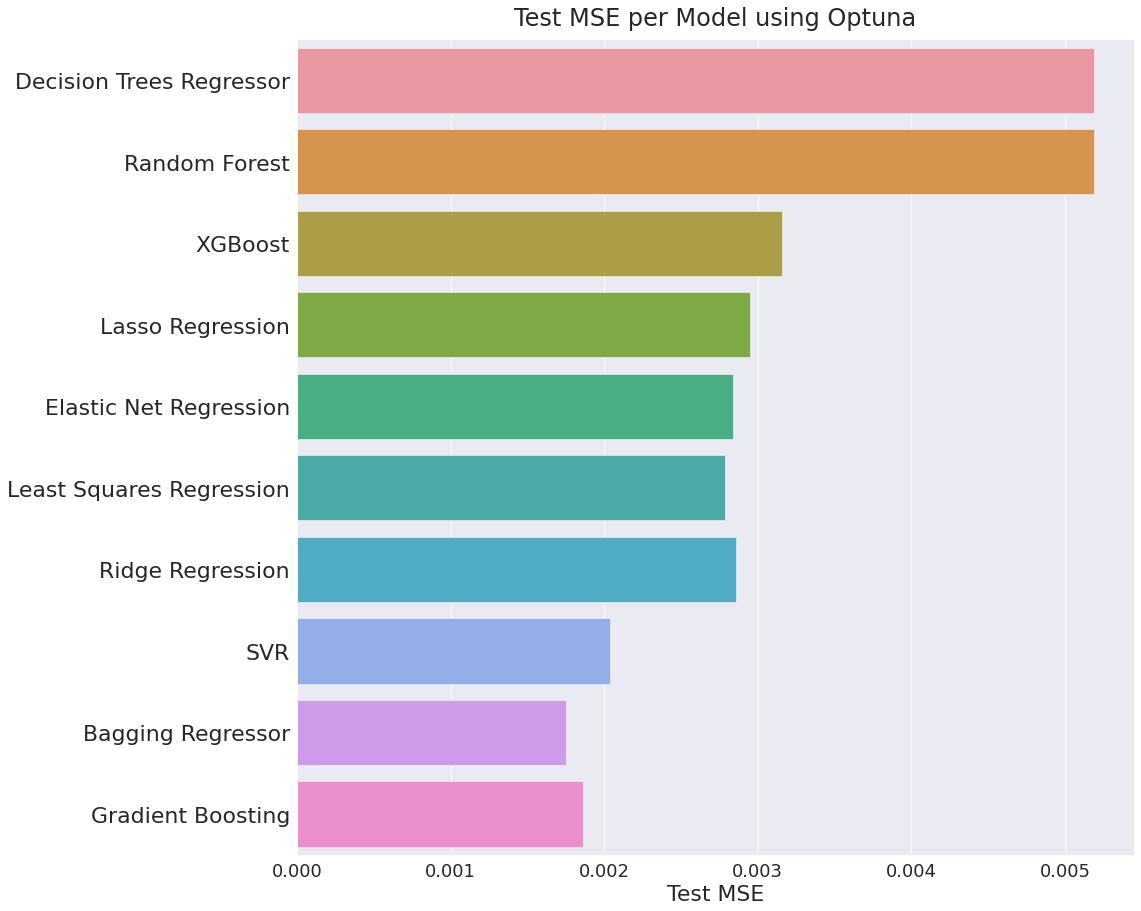

In [70]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using Optuna", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

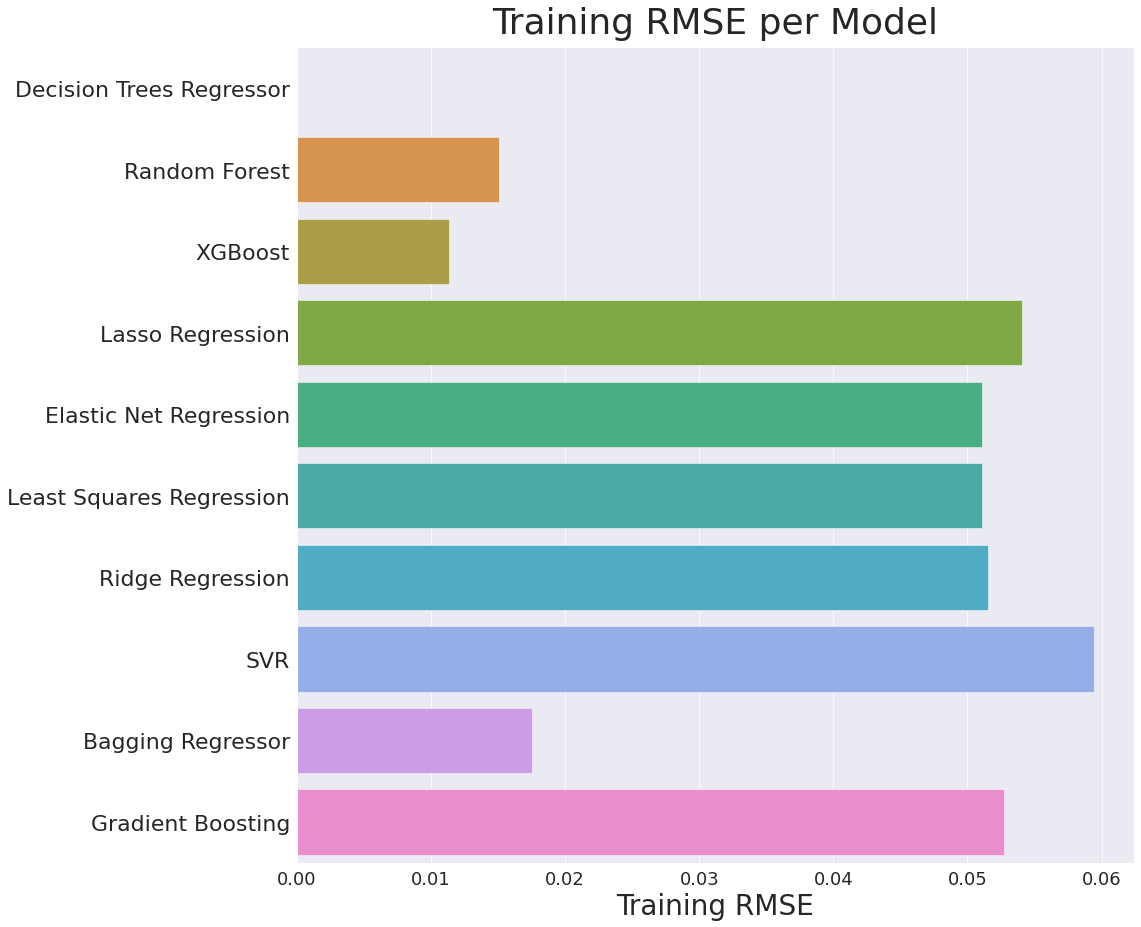

In [71]:
# Training RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training RMSE per Model", size=36, y=1.01)
plt.xlabel("Training RMSE", size=28)
plt.savefig('rmsetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

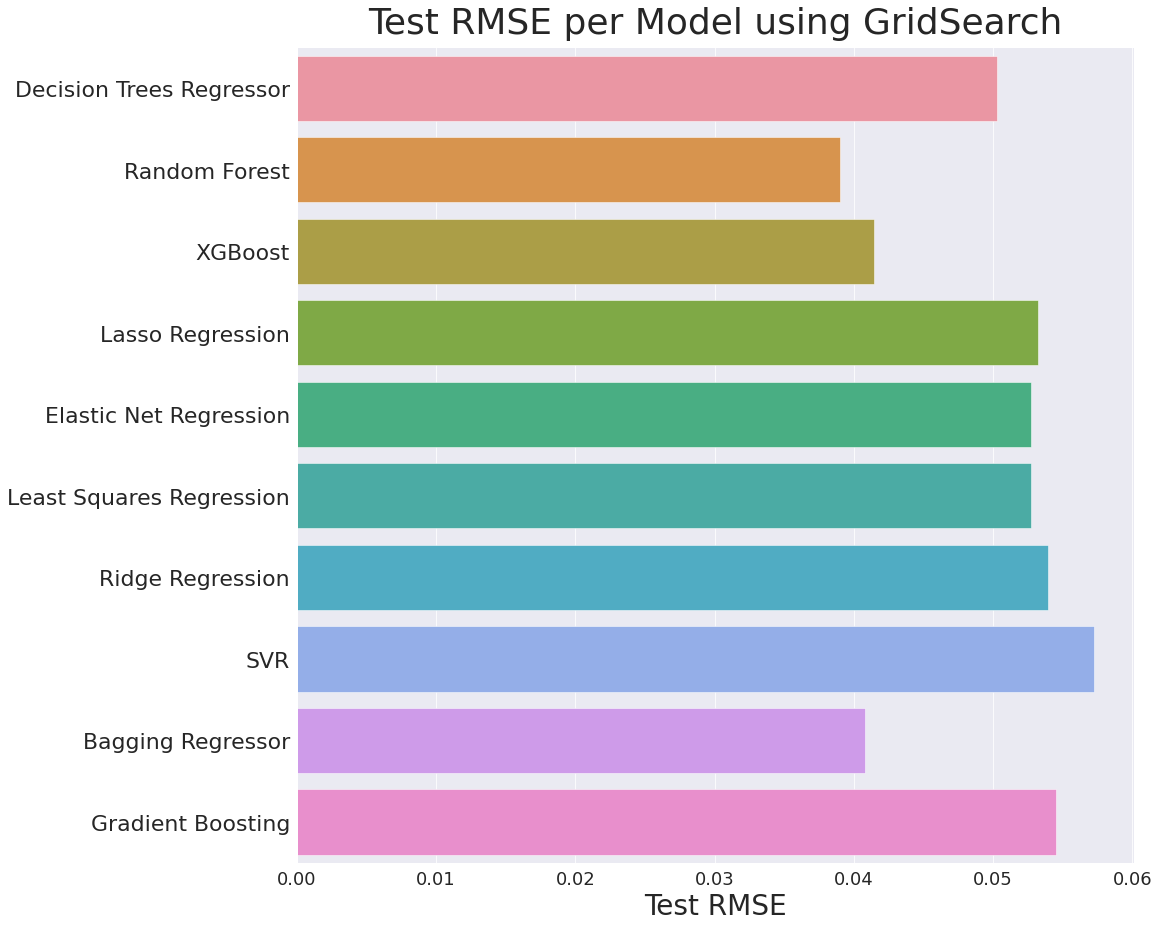

In [72]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using GridSearch", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

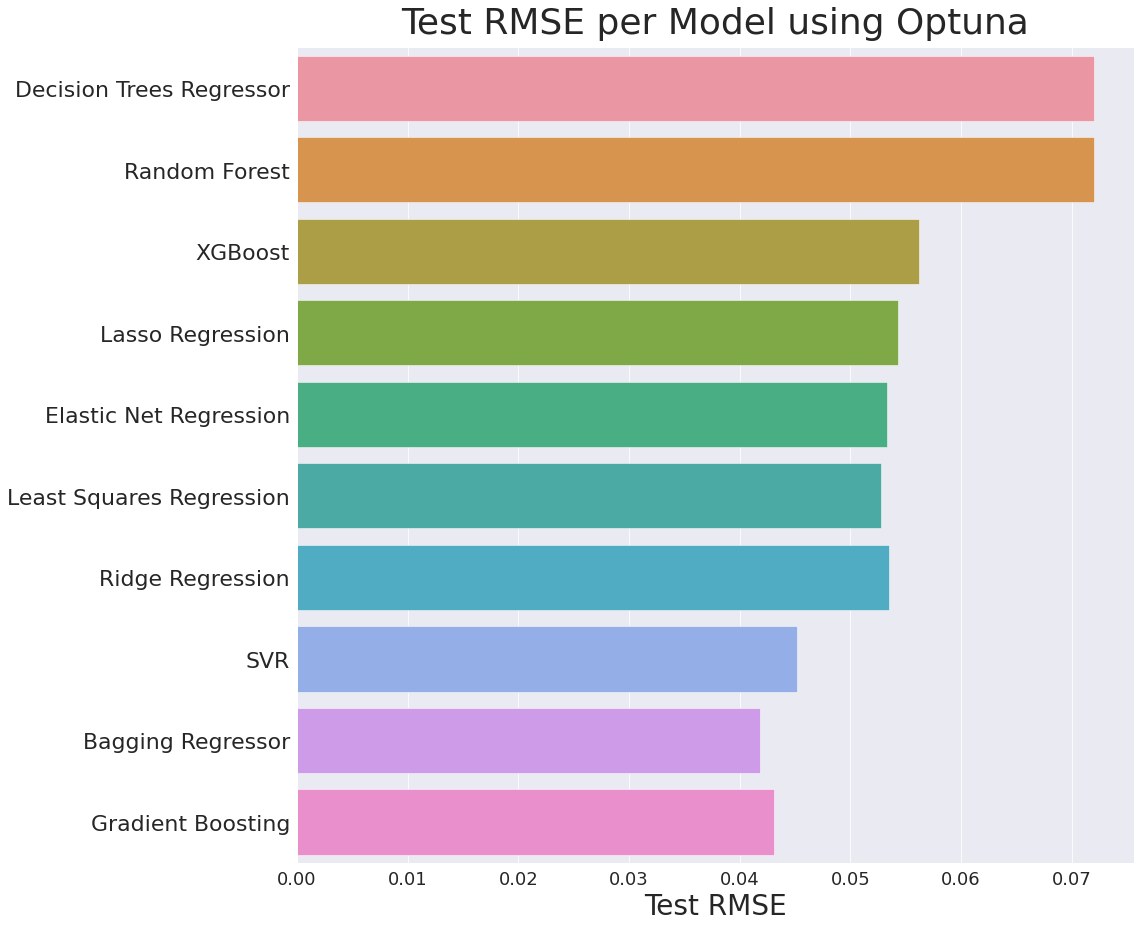

In [73]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using Optuna", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Final Model Decision

The **Gradient Bossting model** returns us with the best accuracy on the Test Set using Optuna hyperparameter based on MSE and RMSE metrics. We use a the feature importance attribute to notice the importance of the *ENERGYSTARScore* and we can see that the variable scores far from the top 10 variables which make it not important in the decision of the model design. 